In [1]:
# Mount the google drive
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
import os
import numpy as np
import pandas as pd
from pprint import pprint
from tqdm.notebook import tqdm
from sklearn.impute import SimpleImputer

In [3]:
datadir = '/content/gdrive/My Drive/data_3_12/'

In [4]:
sur_df = pd.read_csv(os.path.join(datadir,"data.csv"))
sur_df.head(10)

,participant,Email:1,age:1,Vis:1,VisFix:1,Status:1,Hindi:1,Hindi:2,Hindi:3,Hindi:4,English:1,English:2,English:3,English:4,lchoice:1,lchoice:2,lchoice:3,lchoice:4,lchoice:5,lchoice:6,lchoice:7,lchoice:8,lchoice:9,lchoice:10,lchoice:11,lchoice:12,pseudex:1,Thank:1,TIME_start,TIME_end,TIME_total
0,s.2e95df5d-5932-4808-bc57-072590642426.txt,shlokpandey123@gmail.com,20,2,NaN,1,5,5,5,5,3,3,4,4,2,2,1,1,2,2,3,2,3,3,1,1,pseudovalidation_exp.2021-11-30-0833.data.2e95...,Experiment was done very well. GG,2021-11-30-08-26,2021-11-30-08-34,8
1,s.67a27c69-ad1f-4483-9657-fc53e1805d7c.txt,vsg051007@gmail.com,42,1,2.0,1,3,2,2,1,3,4,4,4,2,2,2,1,2,2,1,2,3,3,1,3,pseudovalidation_exp.2021-12-03-1438.data.67a2...,many of the spellings were in different form o...,2021-12-03-14-26,2021-12-03-14-40,14
2,s.60385e94-29fc-4ffb-878f-867665113c18.txt,mihir.bani@research.iiit.ac.in,21,2,NaN,1,4,4,3,2,3,3,4,2,2,2,3,1,2,2,1,2,2,2,1,1,pseudovalidation_exp.2021-11-28-0806.data.6038...,NaN,2021-11-28-07-56,2021-11-28-08-06,10
3,s.c40f67fa-a84a-48b5-938a-df2b67b01ea2.txt,yashbhansali0906@gmail.com,21,4,NaN,1,5,5,4,3,4,4,4,5,2,2,3,3,3,2,3,2,1,3,1,3,pseudovalidation_exp.2021-11-26-1740.data.c40f...,NaN,2021-11-26-17-30,2021-11-26-17-40,10
4,s.92ad5af8-a1a6-4e2f-bb7c-12547e641bea.txt,praneetside@gmail.com,21,1,1.0,1,4,4,5,4,3,4,5,3,2,2,2,1,1,2,1,2,2,2,1,1,pseudovalidation_exp.2021-11-26-1719.data.92ad...,NaN,2021-11-26-17-12,2021-11-26-17-19,7
5,s.ed01661c-3e6e-45b8-9f79-66a324f8bd85.txt,gokul.vamsi@research.iiit.ac.in,19,1,1.0,1,3,4,4,2,5,5,5,5,2,2,2,2,2,2,2,2,2,2,2,2,pseudovalidation_exp.2021-11-29-1418.data.ed01...,NaN,2021-11-29-14-09,2021-11-29-14-19,10
6,s.6a95fe00-3501-4915-a652-2ce6375bc9fd.txt,rajputsaransh007@gmail.com,21,2,NaN,1,4,5,4,4,4,5,5,4,2,2,2,2,2,2,3,2,2,3,1,3,pseudovalidation_exp.2021-11-29-0910.data.6a95...,NaN,2021-11-29-09-03,2021-11-29-09-10,7
7,s.7e5bd8da-7e75-4c49-bbd0-4d71dffa5dc2.txt,rotkarvasu@gmail.com,20,1,1.0,1,5,5,5,5,5,5,5,5,3,3,1,1,1,2,1,2,1,3,1,1,pseudovalidation_exp.2021-11-26-1720.data.7e5b...,NaN,2021-11-26-17-13,2021-11-26-17-21,8
8,s.7677a9db-0864-474a-a544-6ecbbfddc039.txt,srijan.chakraborty@research.iiit.ac.in,20,2,NaN,1,4,4,4,3,5,4,5,5,2,2,2,2,3,2,2,2,2,3,2,3,pseudovalidation_exp.2021-12-03-1143.data.7677...,thanks!,2021-12-03-11-34,2021-12-03-11-44,10
9,s.02a37d7a-71b5-4711-939d-1ba2770aaaa0.txt,puja.agarwal.ito@gmail.com,46,4,NaN,1,5,5,5,5,3,3,4,4,2,2,3,1,3,2,3,2,3,1,1,1,pseudovalidation_exp.2021-12-01-1739.data.02a3...,NaN,2021-12-01-17-26,2021-12-01-17-39,13


In [5]:
tim_df = pd.read_csv(os.path.join(datadir,"data_times.csv"))
tim_df.head(10)

,participant,Section_Details,Email,age,Vis,VisFix,Status,Hindi,English,lchoice,Transition,pseudex,Thank,INFOSCREEN,TIME_start,TIME_end,TIME_total
0,s.2e95df5d-5932-4808-bc57-072590642426.txt,3685,19937,10881,12261,NaN,4988,23184,16907,59528,19718,NaN,20189,0,2021-11-30-08-26,2021-11-30-08-34,8
1,s.67a27c69-ad1f-4483-9657-fc53e1805d7c.txt,3139,23323,5691,51638,12339.0,13449,33453,34123,83213,11164,NaN,72720,0,2021-12-03-14-26,2021-12-03-14-40,14
2,s.60385e94-29fc-4ffb-878f-867665113c18.txt,3357,14769,3916,28617,NaN,9136,64424,21670,44789,15085,NaN,3034,0,2021-11-28-07-56,2021-11-28-08-06,10
3,s.c40f67fa-a84a-48b5-938a-df2b67b01ea2.txt,5405,9436,5334,40262,NaN,7361,38027,17053,61152,36620,NaN,6452,0,2021-11-26-17-30,2021-11-26-17-40,10
4,s.92ad5af8-a1a6-4e2f-bb7c-12547e641bea.txt,2427,9336,3263,8268,14573.0,3415,25922,33967,26576,25505,NaN,3459,0,2021-11-26-17-12,2021-11-26-17-19,7
5,s.ed01661c-3e6e-45b8-9f79-66a324f8bd85.txt,3137,15471,5145,17195,13809.0,5332,29994,30073,41495,36686,NaN,6729,0,2021-11-29-14-09,2021-11-29-14-19,10
6,s.6a95fe00-3501-4915-a652-2ce6375bc9fd.txt,2788,11886,2227,10338,NaN,4195,25961,19169,39167,19142,NaN,6247,0,2021-11-29-09-03,2021-11-29-09-10,7
7,s.7e5bd8da-7e75-4c49-bbd0-4d71dffa5dc2.txt,1879,16303,16663,3464,20748.0,6504,9795,6922,54379,1214,NaN,16602,0,2021-11-26-17-13,2021-11-26-17-21,8
8,s.7677a9db-0864-474a-a544-6ecbbfddc039.txt,2663,13239,4908,16102,NaN,4669,18960,10516,52819,6317,NaN,42319,0,2021-12-03-11-34,2021-12-03-11-44,10
9,s.02a37d7a-71b5-4711-939d-1ba2770aaaa0.txt,4499,25562,6278,15375,NaN,7616,58526,67102,82445,64743,NaN,11585,0,2021-12-01-17-26,2021-12-01-17-39,13


In [6]:
sti_df = pd.read_csv(os.path.join(datadir,'stimuli.csv'))
print(f"unique stimuli: {len(sti_df['stimuli'].unique())}")
sti_df.head(10)

unique stimuli: 60


,stimuli,category
0,upiyat,pslong
1,asnmvanngh,pslong
2,jarjnnd,pslong
3,khalatvki,pslong
4,thera,pslong
5,lulphnn,pslong
6,barijaz,pslong
7,shinnshit,pslong
8,dakdoon,pslong
9,tyoglnn,pslong


In [7]:
exp_df = {}
exp_df['participant'] = []
for _, row in sti_df.iterrows():
  s = row['stimuli']
  exp_df[f'{s}_wrd_rat'] = []
  exp_df[f'{s}_wrd_tim'] = []
  exp_df[f'{s}_fam_rat'] = []
  exp_df[f'{s}_fam_tim'] = []


for _, row in tqdm(list(sur_df.iterrows())):
  pid, exp_pid_path = row['participant'], row['pseudex:1']
  exp_pid_raw = [l.split() for l in [l.strip() for l in open(os.path.join(datadir,exp_pid_path)).read().split('\n') if l.strip()!='']] 
  assert len(exp_pid_raw) == 2*len(sti_df)

  exp_pid_rec = {}
  for raw in exp_pid_raw:
    if raw[0] not in exp_pid_rec:
      exp_pid_rec[raw[0]] = {'wrd_rat':raw[1],'wrd_tim':raw[2],'fam_rat':None,'fam_tim':None}
    else:
      exp_pid_rec[raw[0]]['fam_rat'] = raw[1]
      exp_pid_rec[raw[0]]['fam_tim'] = raw[2]

  exp_df['participant'].append(pid)

  for _, row in sti_df.iterrows():
    s = row['stimuli']
    exp_df[f'{s}_wrd_rat'].append(exp_pid_rec[s]['wrd_rat'])
    exp_df[f'{s}_wrd_tim'].append(exp_pid_rec[s]['wrd_tim'])
    exp_df[f'{s}_fam_rat'].append(exp_pid_rec[s]['fam_rat'])
    exp_df[f'{s}_fam_tim'].append(exp_pid_rec[s]['fam_tim'])

exp_df = pd.DataFrame(exp_df)
exp_df.head(5)

  0%|          | 0/42 [00:00<?, ?it/s]

,participant,upiyat_wrd_rat,upiyat_wrd_tim,upiyat_fam_rat,upiyat_fam_tim,asnmvanngh_wrd_rat,asnmvanngh_wrd_tim,asnmvanngh_fam_rat,asnmvanngh_fam_tim,jarjnnd_wrd_rat,jarjnnd_wrd_tim,jarjnnd_fam_rat,jarjnnd_fam_tim,khalatvki_wrd_rat,khalatvki_wrd_tim,khalatvki_fam_rat,khalatvki_fam_tim,thera_wrd_rat,thera_wrd_tim,thera_fam_rat,thera_fam_tim,lulphnn_wrd_rat,lulphnn_wrd_tim,lulphnn_fam_rat,lulphnn_fam_tim,barijaz_wrd_rat,barijaz_wrd_tim,barijaz_fam_rat,barijaz_fam_tim,shinnshit_wrd_rat,shinnshit_wrd_tim,shinnshit_fam_rat,shinnshit_fam_tim,dakdoon_wrd_rat,dakdoon_wrd_tim,dakdoon_fam_rat,dakdoon_fam_tim,tyoglnn_wrd_rat,tyoglnn_wrd_tim,tyoglnn_fam_rat,...,bari_wrd_rat,bari_wrd_tim,bari_fam_rat,bari_fam_tim,baston_wrd_rat,baston_wrd_tim,baston_fam_rat,baston_fam_tim,majhin_wrd_rat,majhin_wrd_tim,majhin_fam_rat,majhin_fam_tim,barso_wrd_rat,barso_wrd_tim,barso_fam_rat,barso_fam_tim,vrishti_wrd_rat,vrishti_wrd_tim,vrishti_fam_rat,vrishti_fam_tim,chhutte_wrd_rat,chhutte_wrd_tim,chhutte_fam_rat,chhutte_fam_tim,oophan_wrd_rat,oophan_wrd_tim,oophan_fam_rat,oophan_fam_tim,tahal_wrd_rat,tahal_wrd_tim,tahal_fam_rat,tahal_fam_tim,saph_wrd_rat,saph_wrd_tim,saph_fam_rat,saph_fam_tim,tope_wrd_rat,tope_wrd_tim,tope_fam_rat,tope_fam_tim
0,s.2e95df5d-5932-4808-bc57-072590642426.txt,4,2651,3,920,4,4275,3,2679,-1,0,3,906,5,6576,2,1056,4,915,3,949,1,1927,1,1913,3,2523,1,1516,5,4299,4,3212,3,2018,1,1323,4,1958,3,...,7,1213,7,417,2,3931,1,1005,5,2104,1,3615,7,2104,7,460,7,1441,7,470,7,548,7,441,7,1049,7,417,7,1457,7,461,7,1814,7,778,3,1973,2,1143
1,s.67a27c69-ad1f-4483-9657-fc53e1805d7c.txt,7,2862,4,2087,-1,0,4,990,4,6473,4,3286,-1,0,2,3041,7,7023,4,2012,6,4839,4,1376,3,4655,3,1262,6,3664,4,2967,7,4498,4,1833,6,3300,6,...,7,2820,7,1286,2,4477,2,2953,7,2128,4,1509,7,5708,6,3056,7,2723,6,4079,7,9397,7,2119,6,5656,6,1359,7,4146,7,1282,7,3810,6,1628,5,4886,6,4617
2,s.60385e94-29fc-4ffb-878f-867665113c18.txt,5,4280,5,1857,5,8329,5,618,5,4418,2,1155,3,4357,3,371,7,3294,7,337,2,7393,2,562,5,3955,5,381,6,5776,2,616,5,5938,1,2299,-1,0,1,...,7,1357,7,364,7,2437,7,309,6,3994,6,581,7,4019,7,337,6,3554,6,297,7,1771,7,331,6,2697,5,3022,7,1451,7,385,7,1083,7,374,7,4704,7,623
3,s.c40f67fa-a84a-48b5-938a-df2b67b01ea2.txt,4,3787,1,1100,4,4331,1,1011,6,4260,1,890,6,9469,1,1916,5,3516,1,784,5,6212,1,1827,7,5194,1,1083,6,6634,1,950,4,3740,1,1116,5,3807,1,...,7,2648,7,2169,1,4666,1,398,4,8047,1,5018,7,1856,7,399,6,5088,1,1128,7,4887,7,351,7,1059,7,701,7,2993,7,233,7,1527,7,134,7,3407,7,232
4,s.92ad5af8-a1a6-4e2f-bb7c-12547e641bea.txt,3,4180,3,1040,4,5518,2,1618,4,4748,2,939,2,7646,2,1676,5,3290,2,1606,3,5738,3,930,5,3632,2,1076,7,3073,2,1267,6,3209,3,982,2,3673,1,...,7,1438,7,287,4,3117,3,1459,5,2838,3,598,7,1847,7,339,7,998,7,375,7,1441,7,121,7,1620,7,270,7,1156,7,362,7,1010,7,269,7,2262,7,245


# Stimuli Categories

In [8]:
sti_df.category.unique()

array(['pslong', 'psshort', 'hflong', 'hfshort', 'lflong', 'lfshort'],
      dtype=object)

In [9]:
cats = {'pslong':['pslong'],
        'psshort':['psshort'],
        'hflong':['hflong'],
        'hfshort':['hfshort'],
        'lflong':['lflong'],
        'lfshort':['lfshort'],
        'word':['hflong','hfshort','lflong','lfshort'],
        'pseudo':['pslong','psshort'],
        'high':['hflong','hfshort'],
        'low':['lflong','lfshort']}
sti_ct = {}

for c, l in cats.items():
  sti_ct[c] = list(sti_df[sti_df.category.isin(l)]['stimuli'])

# pprint(sti_ct)

# Imputation

### Rating Imputation (-1)

In [10]:
# wrd_rat_cols = [f'{w}_wrd_rat' for w in sti_df['stimuli']]
# fam_rat_cols = [f'{w}_fam_rat' for w in sti_df['stimuli']]

# wrd_tim_cols = [f'{w}_wrd_tim' for w in sti_df['stimuli']]
# fam_tim_cols = [f'{w}_fam_tim' for w in sti_df['stimuli']]

# wrd_rat_df = exp_df[wrd_rat_cols]
# fam_rat_df = exp_df[fam_rat_cols]

# wrd_tim_df = exp_df[wrd_tim_cols]
# fam_tim_df = exp_df[fam_tim_cols]

# wrd_rat_df_cols = wrd_rat_df.columns
# fam_rat_df_cols = fam_rat_df.columns

# wrd_tim_df_cols = wrd_tim_df.columns
# fam_tim_df_cols = fam_tim_df.columns

In [11]:
def impute(colset):

  print(f'colset: {colset}')
  print(f'words: {sti_ct[colset]}')

  wrd_rat_cols = [f'{w}_wrd_rat' for w in sti_ct[colset]]
  fam_rat_cols = [f'{w}_fam_rat' for w in sti_ct[colset]]

  wrd_tim_cols = [f'{w}_wrd_tim' for w in sti_ct[colset]]
  fam_tim_cols = [f'{w}_fam_tim' for w in sti_ct[colset]]

  wrd_rat_df = exp_df[wrd_rat_cols]
  fam_rat_df = exp_df[fam_rat_cols]

  wrd_tim_df = exp_df[wrd_tim_cols]
  fam_tim_df = exp_df[fam_tim_cols]

  wrd_rat_df_cols = wrd_rat_df.columns
  fam_rat_df_cols = fam_rat_df.columns

  wrd_tim_df_cols = wrd_tim_df.columns
  fam_tim_df_cols = fam_tim_df.columns

  print('wrd_rat_df.head(5)')
  print(wrd_rat_df.head(5))

  print('wrd_tim_df.head(5)')
  print(wrd_tim_df.head(5))

  wrd_rat_df_T = wrd_rat_df.transpose()
  fam_rat_df_T = fam_rat_df.transpose()

  wrd_tim_df_T = wrd_tim_df.transpose()
  fam_tim_df_T = fam_tim_df.transpose()

  print('wrd_rat_df_T.head(5)')
  print(wrd_rat_df_T.head(5))

  print('wrd_tim_df_T.head(5)')
  print(wrd_tim_df_T.head(5))

  imp=SimpleImputer(missing_values=-1)
  wrd_rat_df = pd.DataFrame(imp.fit_transform(wrd_rat_df_T)).transpose()
  wrd_rat_df.columns = wrd_rat_df_cols

  imp=SimpleImputer(missing_values=-1)
  fam_rat_df = pd.DataFrame(imp.fit_transform(fam_rat_df_T)).transpose()
  fam_rat_df.columns = fam_rat_df_cols

  imp=SimpleImputer(missing_values=0)
  wrd_tim_df = pd.DataFrame(imp.fit_transform(wrd_tim_df_T)).transpose()
  wrd_tim_df.columns = wrd_tim_df_cols

  imp=SimpleImputer(missing_values=0)
  fam_tim_df = pd.DataFrame(imp.fit_transform(fam_tim_df_T)).transpose()
  fam_tim_df.columns = fam_tim_df_cols

  print('wrd_rat_df.head(5)')
  print(wrd_rat_df.head(5))

  print('wrd_tim_df.head(5)')
  print(wrd_tim_df.head(5))

  exp_df[wrd_rat_cols] = wrd_rat_df
  exp_df[fam_rat_cols] = fam_rat_df

  exp_df[wrd_tim_cols] = wrd_tim_df
  exp_df[fam_tim_cols] = fam_tim_df

In [12]:
exp_df

,participant,upiyat_wrd_rat,upiyat_wrd_tim,upiyat_fam_rat,upiyat_fam_tim,asnmvanngh_wrd_rat,asnmvanngh_wrd_tim,asnmvanngh_fam_rat,asnmvanngh_fam_tim,jarjnnd_wrd_rat,jarjnnd_wrd_tim,jarjnnd_fam_rat,jarjnnd_fam_tim,khalatvki_wrd_rat,khalatvki_wrd_tim,khalatvki_fam_rat,khalatvki_fam_tim,thera_wrd_rat,thera_wrd_tim,thera_fam_rat,thera_fam_tim,lulphnn_wrd_rat,lulphnn_wrd_tim,lulphnn_fam_rat,lulphnn_fam_tim,barijaz_wrd_rat,barijaz_wrd_tim,barijaz_fam_rat,barijaz_fam_tim,shinnshit_wrd_rat,shinnshit_wrd_tim,shinnshit_fam_rat,shinnshit_fam_tim,dakdoon_wrd_rat,dakdoon_wrd_tim,dakdoon_fam_rat,dakdoon_fam_tim,tyoglnn_wrd_rat,tyoglnn_wrd_tim,tyoglnn_fam_rat,...,bari_wrd_rat,bari_wrd_tim,bari_fam_rat,bari_fam_tim,baston_wrd_rat,baston_wrd_tim,baston_fam_rat,baston_fam_tim,majhin_wrd_rat,majhin_wrd_tim,majhin_fam_rat,majhin_fam_tim,barso_wrd_rat,barso_wrd_tim,barso_fam_rat,barso_fam_tim,vrishti_wrd_rat,vrishti_wrd_tim,vrishti_fam_rat,vrishti_fam_tim,chhutte_wrd_rat,chhutte_wrd_tim,chhutte_fam_rat,chhutte_fam_tim,oophan_wrd_rat,oophan_wrd_tim,oophan_fam_rat,oophan_fam_tim,tahal_wrd_rat,tahal_wrd_tim,tahal_fam_rat,tahal_fam_tim,saph_wrd_rat,saph_wrd_tim,saph_fam_rat,saph_fam_tim,tope_wrd_rat,tope_wrd_tim,tope_fam_rat,tope_fam_tim
0,s.2e95df5d-5932-4808-bc57-072590642426.txt,4,2651,3,920,4,4275,3,2679,-1,0,3,906,5,6576,2,1056,4,915,3,949,1,1927,1,1913,3,2523,1,1516,5,4299,4,3212,3,2018,1,1323,4,1958,3,...,7,1213,7,417,2,3931,1,1005,5,2104,1,3615,7,2104,7,460,7,1441,7,470,7,548,7,441,7,1049,7,417,7,1457,7,461,7,1814,7,778,3,1973,2,1143
1,s.67a27c69-ad1f-4483-9657-fc53e1805d7c.txt,7,2862,4,2087,-1,0,4,990,4,6473,4,3286,-1,0,2,3041,7,7023,4,2012,6,4839,4,1376,3,4655,3,1262,6,3664,4,2967,7,4498,4,1833,6,3300,6,...,7,2820,7,1286,2,4477,2,2953,7,2128,4,1509,7,5708,6,3056,7,2723,6,4079,7,9397,7,2119,6,5656,6,1359,7,4146,7,1282,7,3810,6,1628,5,4886,6,4617
2,s.60385e94-29fc-4ffb-878f-867665113c18.txt,5,4280,5,1857,5,8329,5,618,5,4418,2,1155,3,4357,3,371,7,3294,7,337,2,7393,2,562,5,3955,5,381,6,5776,2,616,5,5938,1,2299,-1,0,1,...,7,1357,7,364,7,2437,7,309,6,3994,6,581,7,4019,7,337,6,3554,6,297,7,1771,7,331,6,2697,5,3022,7,1451,7,385,7,1083,7,374,7,4704,7,623
3,s.c40f67fa-a84a-48b5-938a-df2b67b01ea2.txt,4,3787,1,1100,4,4331,1,1011,6,4260,1,890,6,9469,1,1916,5,3516,1,784,5,6212,1,1827,7,5194,1,1083,6,6634,1,950,4,3740,1,1116,5,3807,1,...,7,2648,7,2169,1,4666,1,398,4,8047,1,5018,7,1856,7,399,6,5088,1,1128,7,4887,7,351,7,1059,7,701,7,2993,7,233,7,1527,7,134,7,3407,7,232
4,s.92ad5af8-a1a6-4e2f-bb7c-12547e641bea.txt,3,4180,3,1040,4,5518,2,1618,4,4748,2,939,2,7646,2,1676,5,3290,2,1606,3,5738,3,930,5,3632,2,1076,7,3073,2,1267,6,3209,3,982,2,3673,1,...,7,1438,7,287,4,3117,3,1459,5,2838,3,598,7,1847,7,339,7,998,7,375,7,1441,7,121,7,1620,7,270,7,1156,7,362,7,1010,7,269,7,2262,7,245
5,s.ed01661c-3e6e-45b8-9f79-66a324f8bd85.txt,2,2050,2,152,2,4603,2,332,2,1715,2,272,2,7072,2,879,1,3773,1,225,3,4032,2,1291,1,1403,1,228,2,2620,2,902,2,4869,2,442,3,5505,3,...,7,3506,7,1775,5,3384,4,828,1,3055,1,352,7,2170,6,1177,3,2811,3,1081,7,3865,5,1785,7,5212,1,1351,7,1937,7,283,7,1303,7,230,1,5061,1,465
6,s.6a95fe00-3501-4915-a652-2ce6375bc9fd.txt,5,5197,1,592,1,5627,1,214,2,3247,1,385,3,6065,1,339,5,2261,1,395,5,1923,1,825,3,6286,3,480,3,5686,1,363,5,3979,1,459,1,5448,1,...,7,1005,7,201,7,2520,7,183,5,2757,1,481,7,638,7,187,7,5822,5,3390,7,1492,7,232,7,1447,7,168,7,1056,7,971,7,1268,7,70,7,2496,7,204
7,s.7e5bd8da-7e75-4c49-bbd0-4d71dffa5dc2.txt,7,2512,1,558,7,7720,1,2583,6,4441,2,1269,4,5672,1,3573,4,7585,4,549,6,6021,2,1440,7,5987,1,1854,7,3555,5,3053,7,8792,1,1734,6,7253,2,...,7,954,7,365,7,6636,7,5092,5,4898,1,894,7,1448,7,183,7,1392,1,1690,7,4889,7,482,7,1264,7,270,7,1409,7,242,7,905,7,306,7,1675,7,644
8,s.7677a9db-0864-474a-a544-6ecbbfddc039.txt,3,3462,3,1479,2,5379,1,4006,5,7874,2,3712,3,5730,2,1544,5,5769,2,837,3,7152,2,1237,2,6600,1,1997,5,8048,3,1166,3,8055,2,2167,2,6915,2,...,7,2810,7,388,3,5493,2,2400,2,5565,2,1219,7,3770,5,1005,7,3676,7,387,7,2528,7,402,2,3397,2,1619,7

In [13]:
impute('pslong')
impute('psshort')
impute('hflong')
impute('hfshort')
impute('lflong')
impute('lfshort')

colset: pslong
words: ['upiyat', 'asnmvanngh', 'jarjnnd', 'khalatvki', 'thera', 'lulphnn', 'barijaz', 'shinnshit', 'dakdoon', 'tyoglnn']
wrd_rat_df.head(5)
  upiyat_wrd_rat asnmvanngh_wrd_rat  ... dakdoon_wrd_rat tyoglnn_wrd_rat
0              4                  4  ...               3               4
1              7                 -1  ...               7               6
2              5                  5  ...               5              -1
3              4                  4  ...               4               5
4              3                  4  ...               6               2

[5 rows x 10 columns]
wrd_tim_df.head(5)
  upiyat_wrd_tim asnmvanngh_wrd_tim  ... dakdoon_wrd_tim tyoglnn_wrd_tim
0           2651               4275  ...            2018            1958
1           2862                  0  ...            4498            3300
2           4280               8329  ...            5938               0
3           3787               4331  ...            3740            3807

In [14]:
exp_df

,participant,upiyat_wrd_rat,upiyat_wrd_tim,upiyat_fam_rat,upiyat_fam_tim,asnmvanngh_wrd_rat,asnmvanngh_wrd_tim,asnmvanngh_fam_rat,asnmvanngh_fam_tim,jarjnnd_wrd_rat,jarjnnd_wrd_tim,jarjnnd_fam_rat,jarjnnd_fam_tim,khalatvki_wrd_rat,khalatvki_wrd_tim,khalatvki_fam_rat,khalatvki_fam_tim,thera_wrd_rat,thera_wrd_tim,thera_fam_rat,thera_fam_tim,lulphnn_wrd_rat,lulphnn_wrd_tim,lulphnn_fam_rat,lulphnn_fam_tim,barijaz_wrd_rat,barijaz_wrd_tim,barijaz_fam_rat,barijaz_fam_tim,shinnshit_wrd_rat,shinnshit_wrd_tim,shinnshit_fam_rat,shinnshit_fam_tim,dakdoon_wrd_rat,dakdoon_wrd_tim,dakdoon_fam_rat,dakdoon_fam_tim,tyoglnn_wrd_rat,tyoglnn_wrd_tim,tyoglnn_fam_rat,...,bari_wrd_rat,bari_wrd_tim,bari_fam_rat,bari_fam_tim,baston_wrd_rat,baston_wrd_tim,baston_fam_rat,baston_fam_tim,majhin_wrd_rat,majhin_wrd_tim,majhin_fam_rat,majhin_fam_tim,barso_wrd_rat,barso_wrd_tim,barso_fam_rat,barso_fam_tim,vrishti_wrd_rat,vrishti_wrd_tim,vrishti_fam_rat,vrishti_fam_tim,chhutte_wrd_rat,chhutte_wrd_tim,chhutte_fam_rat,chhutte_fam_tim,oophan_wrd_rat,oophan_wrd_tim,oophan_fam_rat,oophan_fam_tim,tahal_wrd_rat,tahal_wrd_tim,tahal_fam_rat,tahal_fam_tim,saph_wrd_rat,saph_wrd_tim,saph_fam_rat,saph_fam_tim,tope_wrd_rat,tope_wrd_tim,tope_fam_rat,tope_fam_tim
0,s.2e95df5d-5932-4808-bc57-072590642426.txt,4.0,2651.0,3.0,920.0,4.000000,4275.000000,3.0,2679.0,3.666667,3015.777778,3.0,906.0,5.000000,6576.000000,2.0,1056.0,4.000000,915.000000,3.0,949.0,1.0,1927.0,1.0,1913.0,3.000000,2523.000000,1.0,1516.0,5.000000,4299.000000,4.0,3212.0,3.0,2018.0,1.0,1323.0,4.000000,1958.000000,3.0,...,7.0,1213.0,7.0,417.0,2.000000,3931.000000,1.0,1005.0,5.0,2104.0,1.0,3615.0,7.0,2104.0,7.0,460.0,7.0,1441.0,7.0,470.0,7.0,548.0,7.0,441.0,7.0,1049.0,7.0,417.0,7.0,1457.0,7.0,461.0,7.0,1814.000,7.0,778.0,3.0,1973.000,2.000000,1143.000000
1,s.67a27c69-ad1f-4483-9657-fc53e1805d7c.txt,7.0,2862.0,4.0,2087.0,5.750000,4664.250000,4.0,990.0,4.000000,6473.000000,4.0,3286.0,5.750000,4664.250000,2.0,3041.0,7.000000,7023.000000,4.0,2012.0,6.0,4839.0,4.0,1376.0,3.000000,4655.000000,3.0,1262.0,6.000000,3664.000000,4.0,2967.0,7.0,4498.0,4.0,1833.0,6.000000,3300.000000,6.0,...,7.0,2820.0,7.0,1286.0,2.000000,4477.000000,2.0,2953.0,7.0,2128.0,4.0,1509.0,7.0,5708.0,6.0,3056.0,7.0,2723.0,6.0,4079.0,7.0,9397.0,7.0,2119.0,6.0,5656.0,6.0,1359.0,7.0,4146.0,7.0,1282.0,7.0,3810.000,6.0,1628.0,5.0,4886.000,6.000000,4617.000000
2,s.60385e94-29fc-4ffb-878f-867665113c18.txt,5.0,4280.0,5.0,1857.0,5.000000,8329.000000,5.0,618.0,5.000000,4418.000000,2.0,1155.0,3.000000,4357.000000,3.0,371.0,7.000000,3294.000000,7.0,337.0,2.0,7393.0,2.0,562.0,5.000000,3955.000000,5.0,381.0,6.000000,5776.000000,2.0,616.0,5.0,5938.0,1.0,2299.0,4.777778,5304.444444,1.0,...,7.0,1357.0,7.0,364.0,7.000000,2437.000000,7.0,309.0,6.0,3994.0,6.0,581.0,7.0,4019.0,7.0,337.0,6.0,3554.0,6.0,297.0,7.0,1771.0,7.0,331.0,6.0,2697.0,5.0,3022.0,7.0,1451.0,7.0,385.0,7.0,1083.000,7.0,374.0,7.0,4704.000,7.000000,623.000000
3,s.c40f67fa-a84a-48b5-938a-df2b67b01ea2.txt,4.0,3787.0,1.0,1100.0,4.000000,4331.000000,1.0,1011.0,6.000000,4260.000000,1.0,890.0,6.000000,9469.000000,1.0,1916.0,5.000000,3516.000000,1.0,784.0,5.0,6212.0,1.0,1827.0,7.000000,5194.000000,1.0,1083.0,6.000000,6634.000000,1.0,950.0,4.0,3740.0,1.0,1116.0,5.000000,3807.000000,1.0,...,7.0,2648.0,7.0,2169.0,1.000000,4666.000000,1.0,398.0,4.0,8047.0,1.0,5018.0,7.0,1856.0,7.0,399.0,6.0,5088.0,1.0,1128.0,7.0,4887.0,7.0,351.0,7.0,1059.0,7.0,701.0,7.0,2993.0,7.0,233.0,7.0,1527.000,7.0,134.0,7.0,3407.000,7.000000,232.000000
4,s.92ad5af8-a1a6-4e2f-bb7c-12547e641bea.txt,3.0,4180.0,3.0,1040.0,4.000000,5518.000000,2.0,1618.0,4.000000,4748.000000,2.0,939.0,2.000000,7646.000000,2.0,1676.0,5.000000,3290.000000,2.0,1606.0,3.0,5738.0,3.0,930.0,5.000000,3632.000000,2.0,1076.0,7.000000,3073.000000,2.0,1267.0,6.0,3209.0,3.0,982.0,2.000000,3673.000000,1.0,...,7.0,1438.0,7.0,287.0,4.000000,3117.000000,3.0,1459.0,5.0,2838.0,3.0,598.0,7.0,1847.0,7.0,339.0,7.0,998.0,7.0,375.0,7.0,1441.0,7.0,121.0,7.0,1620.0,7.0,270.0,7.0,1156.0,7.0,

In [ ]:
# t = wrd_rat_df[wrd_rat_df=='-1']; t = t.replace('-1',-1); t=t.fillna(0); t

In [ ]:
# wrd_rat_df.head(5)

In [ ]:
# wrd_tim_df.head(5)

In [ ]:
# wrd_rat_df_T = wrd_rat_df.transpose()
# fam_rat_df_T = fam_rat_df.transpose()

# wrd_tim_df_T = wrd_tim_df.transpose()
# fam_tim_df_T = fam_tim_df.transpose()

In [ ]:
# wrd_rat_df_T.head(5)

In [ ]:
# wrd_tim_df_T.head(5)

In [ ]:
# imp=SimpleImputer(missing_values=-1)
# wrd_rat_df = pd.DataFrame(imp.fit_transform(wrd_rat_df_T)).transpose()
# wrd_rat_df.columns = wrd_rat_df_cols

# imp=SimpleImputer(missing_values=-1)
# fam_rat_df = pd.DataFrame(imp.fit_transform(fam_rat_df_T)).transpose()
# fam_rat_df.columns = fam_rat_df_cols

# imp=SimpleImputer(missing_values=0)
# wrd_tim_df = pd.DataFrame(imp.fit_transform(wrd_tim_df_T)).transpose()
# wrd_tim_df.columns = wrd_tim_df_cols

# imp=SimpleImputer(missing_values=0)
# fam_tim_df = pd.DataFrame(imp.fit_transform(fam_tim_df_T)).transpose()
# fam_tim_df.columns = fam_tim_df_cols

In [ ]:
# wrd_rat_df.head(5)

In [ ]:
# wrd_tim_df.head(5)

In [ ]:
# exp_df[wrd_rat_cols] = wrd_rat_df
# exp_df[fam_rat_cols] = fam_rat_df

# exp_df[wrd_tim_cols] = wrd_tim_df
# exp_df[fam_tim_cols] = fam_tim_df

In [ ]:
# exp_df.head(5)

# Outlier Removal

### w.r.t Reaction Time

In [15]:
wrd_tim_cols = [f'{w}_wrd_tim' for w in sti_df['stimuli']]
fam_tim_cols = [f'{w}_fam_tim' for w in sti_df['stimuli']]

#1. wrd
Q = exp_df[wrd_tim_cols].mean(axis=1); Q1 = Q.quantile(0.25); Q3 = Q.quantile(0.75)
print(Q1,Q3)
wrd_outliers = set(exp_df[(Q<Q1) | (Q>Q3)]['participant'])

#1. fam
Q = exp_df[fam_tim_cols].mean(axis=1); Q1 = Q.quantile(0.25); Q3 = Q.quantile(0.75)
print(Q1,Q3)
fam_outliers = set(exp_df[(Q<Q1) | (Q>Q3)]['participant'])

#1. wrd
Q = exp_df[wrd_tim_cols].mean(axis=1) + exp_df[fam_tim_cols].mean(axis=1); Q1 = Q.quantile(0.25); Q3 = Q.quantile(0.75)
print(Q1,Q3)
ovr_outliers = set(exp_df[(Q<Q1) | (Q>Q3)]['participant'])

2935.176851851852 4162.937152777778
791.4833333333333 1439.5208333333335
3625.0226851851844 5498.141203703704


In [16]:
print(wrd_outliers)
print(fam_outliers)
print(ovr_outliers)

{'s.57206276-2b6c-478b-86b3-e1ac5903a14a.txt', 's.2e95df5d-5932-4808-bc57-072590642426.txt', 's.d64736c1-8c0b-49dc-a69e-e639f28eac9e.txt', 's.761dc7d9-5d37-47dd-818d-a8c1066a428f.txt', 's.ba75e601-11b9-46d2-88f3-cc2e90e74e00.txt', 's.5fb20d61-f888-4efd-a85b-7025b007947f.txt', 's.941b7e0c-fd2e-446c-a924-d54592414cc0.txt', 's.67a27c69-ad1f-4483-9657-fc53e1805d7c.txt', 's.b10f533a-fcaf-4a43-99ce-6e1be51bbf39.txt', 's.76d48018-be07-4b7a-89dd-096de403d95d.txt', 's.b0ccb353-363e-4246-b74b-f943081d1111.txt', 's.7677a9db-0864-474a-a544-6ecbbfddc039.txt', 's.47471c9d-16cd-4f53-808f-8950ca8bb33f.txt', 's.60385e94-29fc-4ffb-878f-867665113c18.txt', 's.7cd0d566-6572-4f26-ae71-54d6747af1cd.txt', 's.191b6aa7-7684-4e68-bb97-76ad7444cfd2.txt', 's.ac411e78-5e9b-4f9e-a0d7-584651264878.txt', 's.863c6dd2-8304-4595-94bd-86ffb79f5b6b.txt', 's.eba95d50-0808-42cb-a479-e9c627ab153e.txt', 's.6a95fe00-3501-4915-a652-2ce6375bc9fd.txt', 's.92ad5af8-a1a6-4e2f-bb7c-12547e641bea.txt', 's.8326fca6-08e0-46ce-add1-13eba0

In [17]:
com_outliers = wrd_outliers.intersection(fam_outliers.intersection(ovr_outliers))

In [18]:
print(len(com_outliers))
print(com_outliers)
reaction_time_outliers = list(com_outliers)
print(*reaction_time_outliers,sep='\n')

14
{'s.47471c9d-16cd-4f53-808f-8950ca8bb33f.txt', 's.57206276-2b6c-478b-86b3-e1ac5903a14a.txt', 's.941b7e0c-fd2e-446c-a924-d54592414cc0.txt', 's.7677a9db-0864-474a-a544-6ecbbfddc039.txt', 's.67a27c69-ad1f-4483-9657-fc53e1805d7c.txt', 's.191b6aa7-7684-4e68-bb97-76ad7444cfd2.txt', 's.d64736c1-8c0b-49dc-a69e-e639f28eac9e.txt', 's.ac411e78-5e9b-4f9e-a0d7-584651264878.txt', 's.761dc7d9-5d37-47dd-818d-a8c1066a428f.txt', 's.ba75e601-11b9-46d2-88f3-cc2e90e74e00.txt', 's.6a95fe00-3501-4915-a652-2ce6375bc9fd.txt', 's.76d48018-be07-4b7a-89dd-096de403d95d.txt', 's.5fb20d61-f888-4efd-a85b-7025b007947f.txt', 's.8326fca6-08e0-46ce-add1-13eba01845dd.txt'}
s.47471c9d-16cd-4f53-808f-8950ca8bb33f.txt
s.57206276-2b6c-478b-86b3-e1ac5903a14a.txt
s.941b7e0c-fd2e-446c-a924-d54592414cc0.txt
s.7677a9db-0864-474a-a544-6ecbbfddc039.txt
s.67a27c69-ad1f-4483-9657-fc53e1805d7c.txt
s.191b6aa7-7684-4e68-bb97-76ad7444cfd2.txt
s.d64736c1-8c0b-49dc-a69e-e639f28eac9e.txt
s.ac411e78-5e9b-4f9e-a0d7-584651264878.txt
s.761dc7

### w.r.t Accuracy

In [19]:
wrd_thresh = {f:r for f, r in zip([f'{c}_wrd_rat' for c in sti_ct['word']], list(exp_df[[f'{c}_wrd_rat' for c in sti_ct['word']]].mean(axis=0)))}

In [20]:
ratio_thresh = 0.2 # participant is an outlier if they rate below mean for > ratio_thresh fraction of samples
count_thresh = int(ratio_thresh * len(sti_ct['word']))
print(f'count thresh: {count_thresh}')
accuracy_outliers = []
for _, row in exp_df.iterrows():
  pid = row['participant']
  score = sum([row[f] < wrd_thresh[f] for f in [f'{c}_wrd_rat' for c in sti_ct['word']]])
  # print(pid, score)
  if score > count_thresh:
    accuracy_outliers.append([pid,score])
accuracy_outliers.sort(key=lambda x: x[1], reverse=True)
pprint(accuracy_outliers)

count thresh: 8
[['s.57206276-2b6c-478b-86b3-e1ac5903a14a.txt', 23],
 ['s.dace70c2-4cf5-4370-be7a-59c0ab049d19.txt', 23],
 ['s.b10f533a-fcaf-4a43-99ce-6e1be51bbf39.txt', 20],
 ['s.ed01661c-3e6e-45b8-9f79-66a324f8bd85.txt', 18],
 ['s.7677a9db-0864-474a-a544-6ecbbfddc039.txt', 17],
 ['s.ac411e78-5e9b-4f9e-a0d7-584651264878.txt', 17],
 ['s.99d9dbc6-1c5a-40a8-96b2-37eefd92cacb.txt', 16],
 ['s.4a4121a7-394c-486f-935c-7b024ae2b63d.txt', 14],
 ['s.4a145217-faa7-4cf6-a17a-dce53dfac7e8.txt', 14],
 ['s.5fc0d76d-13a5-4a31-8015-d409d6960035.txt', 13],
 ['s.b0ccb353-363e-4246-b74b-f943081d1111.txt', 12],
 ['s.d64736c1-8c0b-49dc-a69e-e639f28eac9e.txt', 12],
 ['s.a81e119e-6c4c-4c89-b0ee-db57458793f4.txt', 12],
 ['s.191b6aa7-7684-4e68-bb97-76ad7444cfd2.txt', 11],
 ['s.be27cb07-a5d0-432b-bac8-8bf67c9b94f2.txt', 11],
 ['s.c5411782-b825-4d0e-b5f5-3948e0f2d7d1.txt', 10],
 ['s.ba75e601-11b9-46d2-88f3-cc2e90e74e00.txt', 10],
 ['s.941b7e0c-fd2e-446c-a924-d54592414cc0.txt', 10],
 ['s.60385e94-29fc-4ffb-878f-8

In [21]:
for o1 in reaction_time_outliers:
  for o2, score in accuracy_outliers:
    if o1==o2:
      print(f'{o1}\t{score}')
      break

s.57206276-2b6c-478b-86b3-e1ac5903a14a.txt	23
s.941b7e0c-fd2e-446c-a924-d54592414cc0.txt	10
s.7677a9db-0864-474a-a544-6ecbbfddc039.txt	17
s.191b6aa7-7684-4e68-bb97-76ad7444cfd2.txt	11
s.d64736c1-8c0b-49dc-a69e-e639f28eac9e.txt	12
s.ac411e78-5e9b-4f9e-a0d7-584651264878.txt	17
s.ba75e601-11b9-46d2-88f3-cc2e90e74e00.txt	10


Manual Removal List

In [22]:
plist = [l.strip() for l in """s.57206276-2b6c-478b-86b3-e1ac5903a14a.txt
s.dace70c2-4cf5-4370-be7a-59c0ab049d19.txt
s.b10f533a-fcaf-4a43-99ce-6e1be51bbf39.txt
s.ed01661c-3e6e-45b8-9f79-66a324f8bd85.txt
s.ac411e78-5e9b-4f9e-a0d7-584651264878.txt
s.7677a9db-0864-474a-a544-6ecbbfddc039.txt""".split('\n') if l.strip()!='']
print(plist)

['s.57206276-2b6c-478b-86b3-e1ac5903a14a.txt', 's.dace70c2-4cf5-4370-be7a-59c0ab049d19.txt', 's.b10f533a-fcaf-4a43-99ce-6e1be51bbf39.txt', 's.ed01661c-3e6e-45b8-9f79-66a324f8bd85.txt', 's.ac411e78-5e9b-4f9e-a0d7-584651264878.txt', 's.7677a9db-0864-474a-a544-6ecbbfddc039.txt']


In [23]:
clean_df = exp_df[~exp_df.participant.isin(plist)]

In [24]:
clean_df

,participant,upiyat_wrd_rat,upiyat_wrd_tim,upiyat_fam_rat,upiyat_fam_tim,asnmvanngh_wrd_rat,asnmvanngh_wrd_tim,asnmvanngh_fam_rat,asnmvanngh_fam_tim,jarjnnd_wrd_rat,jarjnnd_wrd_tim,jarjnnd_fam_rat,jarjnnd_fam_tim,khalatvki_wrd_rat,khalatvki_wrd_tim,khalatvki_fam_rat,khalatvki_fam_tim,thera_wrd_rat,thera_wrd_tim,thera_fam_rat,thera_fam_tim,lulphnn_wrd_rat,lulphnn_wrd_tim,lulphnn_fam_rat,lulphnn_fam_tim,barijaz_wrd_rat,barijaz_wrd_tim,barijaz_fam_rat,barijaz_fam_tim,shinnshit_wrd_rat,shinnshit_wrd_tim,shinnshit_fam_rat,shinnshit_fam_tim,dakdoon_wrd_rat,dakdoon_wrd_tim,dakdoon_fam_rat,dakdoon_fam_tim,tyoglnn_wrd_rat,tyoglnn_wrd_tim,tyoglnn_fam_rat,...,bari_wrd_rat,bari_wrd_tim,bari_fam_rat,bari_fam_tim,baston_wrd_rat,baston_wrd_tim,baston_fam_rat,baston_fam_tim,majhin_wrd_rat,majhin_wrd_tim,majhin_fam_rat,majhin_fam_tim,barso_wrd_rat,barso_wrd_tim,barso_fam_rat,barso_fam_tim,vrishti_wrd_rat,vrishti_wrd_tim,vrishti_fam_rat,vrishti_fam_tim,chhutte_wrd_rat,chhutte_wrd_tim,chhutte_fam_rat,chhutte_fam_tim,oophan_wrd_rat,oophan_wrd_tim,oophan_fam_rat,oophan_fam_tim,tahal_wrd_rat,tahal_wrd_tim,tahal_fam_rat,tahal_fam_tim,saph_wrd_rat,saph_wrd_tim,saph_fam_rat,saph_fam_tim,tope_wrd_rat,tope_wrd_tim,tope_fam_rat,tope_fam_tim
0,s.2e95df5d-5932-4808-bc57-072590642426.txt,4.0,2651.0,3.0,920.0,4.000000,4275.000000,3.0,2679.0,3.666667,3015.777778,3.0,906.0,5.000000,6576.00,2.0,1056.0,4.000000,915.000000,3.0,949.0,1.0,1927.0,1.0,1913.0,3.000000,2523.000000,1.0,1516.0,5.000000,4299.000000,4.0,3212.0,3.0,2018.0,1.0,1323.0,4.000000,1958.000000,3.0,...,7.0,1213.0,7.0,417.0,2.0,3931.0,1.0,1005.0,5.0,2104.0,1.0,3615.0,7.0,2104.0,7.0,460.0,7.0,1441.0,7.0,470.0,7.0,548.0,7.0,441.0,7.0,1049.0,7.0,417.0,7.0,1457.0,7.0,461.0,7.0,1814.0,7.0,778.0,3.0,1973.0,2.000000,1143.000000
1,s.67a27c69-ad1f-4483-9657-fc53e1805d7c.txt,7.0,2862.0,4.0,2087.0,5.750000,4664.250000,4.0,990.0,4.000000,6473.000000,4.0,3286.0,5.750000,4664.25,2.0,3041.0,7.000000,7023.000000,4.0,2012.0,6.0,4839.0,4.0,1376.0,3.000000,4655.000000,3.0,1262.0,6.000000,3664.000000,4.0,2967.0,7.0,4498.0,4.0,1833.0,6.000000,3300.000000,6.0,...,7.0,2820.0,7.0,1286.0,2.0,4477.0,2.0,2953.0,7.0,2128.0,4.0,1509.0,7.0,5708.0,6.0,3056.0,7.0,2723.0,6.0,4079.0,7.0,9397.0,7.0,2119.0,6.0,5656.0,6.0,1359.0,7.0,4146.0,7.0,1282.0,7.0,3810.0,6.0,1628.0,5.0,4886.0,6.000000,4617.000000
2,s.60385e94-29fc-4ffb-878f-867665113c18.txt,5.0,4280.0,5.0,1857.0,5.000000,8329.000000,5.0,618.0,5.000000,4418.000000,2.0,1155.0,3.000000,4357.00,3.0,371.0,7.000000,3294.000000,7.0,337.0,2.0,7393.0,2.0,562.0,5.000000,3955.000000,5.0,381.0,6.000000,5776.000000,2.0,616.0,5.0,5938.0,1.0,2299.0,4.777778,5304.444444,1.0,...,7.0,1357.0,7.0,364.0,7.0,2437.0,7.0,309.0,6.0,3994.0,6.0,581.0,7.0,4019.0,7.0,337.0,6.0,3554.0,6.0,297.0,7.0,1771.0,7.0,331.0,6.0,2697.0,5.0,3022.0,7.0,1451.0,7.0,385.0,7.0,1083.0,7.0,374.0,7.0,4704.0,7.000000,623.000000
3,s.c40f67fa-a84a-48b5-938a-df2b67b01ea2.txt,4.0,3787.0,1.0,1100.0,4.000000,4331.000000,1.0,1011.0,6.000000,4260.000000,1.0,890.0,6.000000,9469.00,1.0,1916.0,5.000000,3516.000000,1.0,784.0,5.0,6212.0,1.0,1827.0,7.000000,5194.000000,1.0,1083.0,6.000000,6634.000000,1.0,950.0,4.0,3740.0,1.0,1116.0,5.000000,3807.000000,1.0,...,7.0,2648.0,7.0,2169.0,1.0,4666.0,1.0,398.0,4.0,8047.0,1.0,5018.0,7.0,1856.0,7.0,399.0,6.0,5088.0,1.0,1128.0,7.0,4887.0,7.0,351.0,7.0,1059.0,7.0,701.0,7.0,2993.0,7.0,233.0,7.0,1527.0,7.0,134.0,7.0,3407.0,7.000000,232.000000
4,s.92ad5af8-a1a6-4e2f-bb7c-12547e641bea.txt,3.0,4180.0,3.0,1040.0,4.000000,5518.000000,2.0,1618.0,4.000000,4748.000000,2.0,939.0,2.000000,7646.00,2.0,1676.0,5.000000,3290.000000,2.0,1606.0,3.0,5738.0,3.0,930.0,5.000000,3632.000000,2.0,1076.0,7.000000,3073.000000,2.0,1267.0,6.0,3209.0,3.0,982.0,2.000000,3673.000000,1.0,...,7.0,1438.0,7.0,287.0,4.0,3117.0,3.0,1459.0,5.0,2838.0,3.0,598.0,7.0,1847.0,7.0,339.0,7.0,998.0,7.0,375.0,7.0,1441.0,7.0,121.0,7.0,1620.0,7.0,270.0,7.0,1156.0,7.0,362.0,7.0,1010.0,7.0,269.0,7.0,2262.0,7.000000,245.000000
6,s.6a95fe00-3501-4915-a652-

In [25]:
clean_df.head(2)

,participant,upiyat_wrd_rat,upiyat_wrd_tim,upiyat_fam_rat,upiyat_fam_tim,asnmvanngh_wrd_rat,asnmvanngh_wrd_tim,asnmvanngh_fam_rat,asnmvanngh_fam_tim,jarjnnd_wrd_rat,jarjnnd_wrd_tim,jarjnnd_fam_rat,jarjnnd_fam_tim,khalatvki_wrd_rat,khalatvki_wrd_tim,khalatvki_fam_rat,khalatvki_fam_tim,thera_wrd_rat,thera_wrd_tim,thera_fam_rat,thera_fam_tim,lulphnn_wrd_rat,lulphnn_wrd_tim,lulphnn_fam_rat,lulphnn_fam_tim,barijaz_wrd_rat,barijaz_wrd_tim,barijaz_fam_rat,barijaz_fam_tim,shinnshit_wrd_rat,shinnshit_wrd_tim,shinnshit_fam_rat,shinnshit_fam_tim,dakdoon_wrd_rat,dakdoon_wrd_tim,dakdoon_fam_rat,dakdoon_fam_tim,tyoglnn_wrd_rat,tyoglnn_wrd_tim,tyoglnn_fam_rat,...,bari_wrd_rat,bari_wrd_tim,bari_fam_rat,bari_fam_tim,baston_wrd_rat,baston_wrd_tim,baston_fam_rat,baston_fam_tim,majhin_wrd_rat,majhin_wrd_tim,majhin_fam_rat,majhin_fam_tim,barso_wrd_rat,barso_wrd_tim,barso_fam_rat,barso_fam_tim,vrishti_wrd_rat,vrishti_wrd_tim,vrishti_fam_rat,vrishti_fam_tim,chhutte_wrd_rat,chhutte_wrd_tim,chhutte_fam_rat,chhutte_fam_tim,oophan_wrd_rat,oophan_wrd_tim,oophan_fam_rat,oophan_fam_tim,tahal_wrd_rat,tahal_wrd_tim,tahal_fam_rat,tahal_fam_tim,saph_wrd_rat,saph_wrd_tim,saph_fam_rat,saph_fam_tim,tope_wrd_rat,tope_wrd_tim,tope_fam_rat,tope_fam_tim
0,s.2e95df5d-5932-4808-bc57-072590642426.txt,4.0,2651.0,3.0,920.0,4.00,4275.00,3.0,2679.0,3.666667,3015.777778,3.0,906.0,5.00,6576.00,2.0,1056.0,4.0,915.0,3.0,949.0,1.0,1927.0,1.0,1913.0,3.0,2523.0,1.0,1516.0,5.0,4299.0,4.0,3212.0,3.0,2018.0,1.0,1323.0,4.0,1958.0,3.0,...,7.0,1213.0,7.0,417.0,2.0,3931.0,1.0,1005.0,5.0,2104.0,1.0,3615.0,7.0,2104.0,7.0,460.0,7.0,1441.0,7.0,470.0,7.0,548.0,7.0,441.0,7.0,1049.0,7.0,417.0,7.0,1457.0,7.0,461.0,7.0,1814.0,7.0,778.0,3.0,1973.0,2.0,1143.0
1,s.67a27c69-ad1f-4483-9657-fc53e1805d7c.txt,7.0,2862.0,4.0,2087.0,5.75,4664.25,4.0,990.0,4.000000,6473.000000,4.0,3286.0,5.75,4664.25,2.0,3041.0,7.0,7023.0,4.0,2012.0,6.0,4839.0,4.0,1376.0,3.0,4655.0,3.0,1262.0,6.0,3664.0,4.0,2967.0,7.0,4498.0,4.0,1833.0,6.0,3300.0,6.0,...,7.0,2820.0,7.0,1286.0,2.0,4477.0,2.0,2953.0,7.0,2128.0,4.0,1509.0,7.0,5708.0,6.0,3056.0,7.0,2723.0,6.0,4079.0,7.0,9397.0,7.0,2119.0,6.0,5656.0,6.0,1359.0,7.0,4146.0,7.0,1282.0,7.0,3810.0,6.0,1628.0,5.0,4886.0,6.0,4617.0


In [26]:
export_df = {col:[] for col in ['participant','value','val_type','w_rate','f_rate','w_rt','f_rt','total_rt']}

In [27]:
for _, row_e in clean_df.iterrows():
  pid = row_e['participant']
  for _, row_s in sti_df.iterrows():
    export_df['participant'].append(pid)
    export_df['value'].append(row_s['stimuli'])
    export_df['val_type'].append(row_s['category'])
    export_df['w_rate'].append(row_e[f'{row_s["stimuli"]}_wrd_rat'])
    export_df['f_rate'].append(row_e[f'{row_s["stimuli"]}_fam_rat'])
    export_df['w_rt'].append(row_e[f'{row_s["stimuli"]}_wrd_tim'])
    export_df['f_rt'].append(row_e[f'{row_s["stimuli"]}_fam_tim'])
    export_df['total_rt'].append(row_e[f'{row_s["stimuli"]}_wrd_tim'] + row_e[f'{row_s["stimuli"]}_fam_tim'])

In [28]:
for f in export_df:
  print(f,len(export_df[f]))

participant 2160
value 2160
val_type 2160
w_rate 2160
f_rate 2160
w_rt 2160
f_rt 2160
total_rt 2160


In [29]:
export_df = pd.DataFrame(export_df)

In [30]:
export_df

,participant,value,val_type,w_rate,f_rate,w_rt,f_rt,total_rt
0,s.2e95df5d-5932-4808-bc57-072590642426.txt,upiyat,pslong,4.000000,3.0,2651.000000,920.0,3571.000000
1,s.2e95df5d-5932-4808-bc57-072590642426.txt,asnmvanngh,pslong,4.000000,3.0,4275.000000,2679.0,6954.000000
2,s.2e95df5d-5932-4808-bc57-072590642426.txt,jarjnnd,pslong,3.666667,3.0,3015.777778,906.0,3921.777778
3,s.2e95df5d-5932-4808-bc57-072590642426.txt,khalatvki,pslong,5.000000,2.0,6576.000000,1056.0,7632.000000
4,s.2e95df5d-5932-4808-bc57-072590642426.txt,thera,pslong,4.000000,3.0,915.000000,949.0,1864.000000
...,...,...,...,...,...,...,...,...
2155,s.5fb20d61-f888-4efd-a85b-7025b007947f.txt,chhutte,lfshort,7.000000,7.0,1528.000000,158.0,1686.000000
2156,s.5fb20d61-f888-4efd-a85b-7025b007947f.txt,oophan,lfshort,7.000000,7.0,1856.000000,259.0,2115.000000
2157,s.5fb20d61-f888-4efd-a85b-7025b007947f.txt,tahal,lfshort,7.000000,7.0,2541.000000,341.0,2882.000000
2158,s.5fb20d61-f888-4efd-a85b-7025b007947f.txt,saph,lfshort,4.000000,4.0,4744.000000,71.0,4815.000000


In [31]:
# getting average wordiness and familiarity scores for each value

ratings_df = export_df
types = ['pslong', 'psshort', 'lflong', 'lfshort', 'hflong', 'hfshort']


wordiness_ratings = {'pslong': 0, 'psshort': 0, 'lflong': 0, 'lfshort': 0, 'hflong': 0, 'hfshort': 0}
familiarity_ratings = {'pslong': 0, 'psshort': 0, 'lflong': 0, 'lfshort': 0, 'hflong': 0, 'hfshort': 0}

wordiness_rt = {'pslong': 0, 'psshort': 0, 'lflong': 0, 'lfshort': 0, 'hflong': 0, 'hfshort': 0}
familiarity_rt = {'pslong': 0, 'psshort': 0, 'lflong': 0, 'lfshort': 0, 'hflong': 0, 'hfshort': 0}

for typ in types:
  print('\n\n')
  print(typ+' mean wordiness score: '+str(ratings_df[ratings_df['val_type'] == typ]['w_rate'].mean()))
  print(typ+' mean familiarity score: '+str(ratings_df[ratings_df['val_type'] == typ]['f_rate'].mean()))
  print()
  print(typ+' s.d of wordiness score: '+str(ratings_df[ratings_df['val_type'] == typ]['w_rate'].std()))
  print(typ+' s.d of familiarity score: '+str(ratings_df[ratings_df['val_type'] == typ]['f_rate'].std()))
  print()

  wordiness_ratings[typ] = ratings_df[ratings_df['val_type'] == typ]['w_rate'].mean()
  wordiness_rt[typ] = ratings_df[ratings_df['val_type'] == typ]['w_rt'].mean()
  familiarity_ratings[typ] = ratings_df[ratings_df['val_type'] == typ]['f_rate'].mean()
  familiarity_rt[typ] = ratings_df[ratings_df['val_type'] == typ]['f_rt'].mean()



print('\n\n')
print('ps mean wordiness score: '+str(ratings_df[(ratings_df['val_type'] == 'pslong') | (ratings_df['val_type'] == 'psshort')]['w_rate'].mean()))
print('ps mean familiarity score: '+str(ratings_df[(ratings_df['val_type'] == 'pslong') | (ratings_df['val_type'] == 'psshort')]['f_rate'].mean()))
print()
print('ps s.d of wordiness score: '+str(ratings_df[(ratings_df['val_type'] == 'pslong') | (ratings_df['val_type'] == 'psshort')]['w_rate'].std()))
print('ps s.d of familiarity score: '+str(ratings_df[(ratings_df['val_type'] == 'pslong') | (ratings_df['val_type'] == 'psshort')]['f_rate'].std()))
print()

print('\n\n')
print('wd mean wordiness score: '+str(ratings_df[(ratings_df['val_type'] == 'hflong') | (ratings_df['val_type'] == 'hfshort') | (ratings_df['val_type'] == 'lflong') | (ratings_df['val_type'] == 'lfshort')]['w_rate'].mean()))
print('wd mean familiarity score: '+str(ratings_df[(ratings_df['val_type'] == 'hflong') | (ratings_df['val_type'] == 'hfshort') | (ratings_df['val_type'] == 'lflong') | (ratings_df['val_type'] == 'lfshort')]['f_rate'].mean()))
print()
print('wd s.d of wordiness score: '+str(ratings_df[(ratings_df['val_type'] == 'hflong') | (ratings_df['val_type'] == 'hfshort') | (ratings_df['val_type'] == 'lflong') | (ratings_df['val_type'] == 'lfshort')]['w_rate'].std()))
print('wd s.d of familiarity score: '+str(ratings_df[(ratings_df['val_type'] == 'hflong') | (ratings_df['val_type'] == 'hfshort') | (ratings_df['val_type'] == 'lflong') | (ratings_df['val_type'] == 'lfshort')]['f_rate'].std()))
print()




pslong mean wordiness score: 3.9364969135802466
pslong mean familiarity score: 2.2472222222222222

pslong s.d of wordiness score: 1.8858922140163228
pslong s.d of familiarity score: 1.5104070013778406




psshort mean wordiness score: 4.3993827160493835
psshort mean familiarity score: 2.7055555555555557

psshort s.d of wordiness score: 1.837502541001501
psshort s.d of familiarity score: 1.7542537945619665




lflong mean wordiness score: 6.482484567901234
lflong mean familiarity score: 5.650925925925926

lflong s.d of wordiness score: 1.1631438647741827
lflong s.d of familiarity score: 2.069976474912725




lfshort mean wordiness score: 6.205555555555556
lfshort mean familiarity score: 5.523765432098766

lfshort s.d of wordiness score: 1.5046713601971256
lfshort s.d of familiarity score: 2.241939227751374




hflong mean wordiness score: 6.431867283950617
hflong mean familiarity score: 5.872222222222222

hflong s.d of wordiness score: 1.2799077772118468
hflong s.d of familiarity sco

In [32]:
print('hf mean wordiness score: '+str(ratings_df[(ratings_df['val_type'] == 'hflong') | (ratings_df['val_type'] == 'hfshort')]['w_rate'].mean()))
print('hf mean familiarity score: '+str(ratings_df[(ratings_df['val_type'] == 'hflong') | (ratings_df['val_type'] == 'hfshort')]['f_rate'].mean()))
print()
print('hf s.d of wordiness score: '+str(ratings_df[(ratings_df['val_type'] == 'hflong') | (ratings_df['val_type'] == 'hfshort')]['w_rate'].std()))
print('hf s.d of familiarity score: '+str(ratings_df[(ratings_df['val_type'] == 'hflong') | (ratings_df['val_type'] == 'hfshort')]['f_rate'].std()))
print()

hf mean wordiness score: 6.4669753086419774
hf mean familiarity score: 6.001388888888889

hf s.d of wordiness score: 1.2372685277041657
hf s.d of familiarity score: 1.7935902763539184



In [33]:
print('lf mean wordiness score: '+str(ratings_df[(ratings_df['val_type'] == 'lflong') | (ratings_df['val_type'] == 'lfshort')]['w_rate'].mean()))
print('lf mean familiarity score: '+str(ratings_df[(ratings_df['val_type'] == 'lflong') | (ratings_df['val_type'] == 'lfshort')]['f_rate'].mean()))
print()
print('lf s.d of wordiness score: '+str(ratings_df[(ratings_df['val_type'] == 'lflong') | (ratings_df['val_type'] == 'lfshort')]['w_rate'].std()))
print('lf s.d of familiarity score: '+str(ratings_df[(ratings_df['val_type'] == 'lflong') | (ratings_df['val_type'] == 'lfshort')]['f_rate'].std()))
print()

lf mean wordiness score: 6.344020061728395
lf mean familiarity score: 5.587345679012345

lf s.d of wordiness score: 1.3509824588255979
lf s.d of familiarity score: 2.157109198268721



In [34]:
print('l mean wordiness score: '+str(ratings_df[(ratings_df['val_type'] == 'pslong') | (ratings_df['val_type'] == 'lflong') | (ratings_df['val_type'] == 'hflong')]['w_rate'].mean()))
print('l mean familiarity score: '+str(ratings_df[(ratings_df['val_type'] == 'pslong') | (ratings_df['val_type'] == 'lflong') | (ratings_df['val_type'] == 'hflong')]['f_rate'].mean()))
print()
print('l s.d of wordiness score: '+str(ratings_df[(ratings_df['val_type'] == 'pslong') | (ratings_df['val_type'] == 'lflong') | (ratings_df['val_type'] == 'hflong')]['w_rate'].std()))
print('l s.d of familiarity score: '+str(ratings_df[(ratings_df['val_type'] == 'pslong') | (ratings_df['val_type'] == 'lflong') | (ratings_df['val_type'] == 'hflong')]['f_rate'].std()))
print()

l mean wordiness score: 5.616949588477367
l mean familiarity score: 4.590123456790124

l s.d of wordiness score: 1.8953109033858369
l s.d of familiarity score: 2.469900189465622



In [35]:
print('s mean wordiness score: '+str(ratings_df[(ratings_df['val_type'] == 'psshort') | (ratings_df['val_type'] == 'hfshort') | (ratings_df['val_type'] == 'lfshort')]['w_rate'].mean()))
print('s mean familiarity score: '+str(ratings_df[(ratings_df['val_type'] == 'psshort') | (ratings_df['val_type'] == 'hfshort') | (ratings_df['val_type'] == 'lfshort')]['f_rate'].mean()))
print()
print('s s.d of wordiness score: '+str(ratings_df[(ratings_df['val_type'] == 'psshort') | (ratings_df['val_type'] == 'hfshort') | (ratings_df['val_type'] == 'lfshort')]['w_rate'].std()))
print('s s.d of familiarity score: '+str(ratings_df[(ratings_df['val_type'] == 'psshort') | (ratings_df['val_type'] == 'hfshort') | (ratings_df['val_type'] == 'lfshort')]['f_rate'].std()))
print()

s mean wordiness score: 5.702340534979424
s mean familiarity score: 4.786625514403292

s s.d of wordiness score: 1.7930944871838483
s s.d of familiarity score: 2.4284051536818168



In [36]:
# Test of Association (Correlation)
from scipy.stats import spearmanr
spearmanr(ratings_df['w_rate'], ratings_df['f_rate'])

SpearmanrResult(correlation=0.8028586689024628, pvalue=0.0)

In [37]:
# pseudowords
# pslong = get_list('../data/pslong_words.txtOUTPUT')
pslong = ['upiyat', 'asnmvanngh', 'jarjnnd', 'khalatvki', 'thera', 'lulphnn', 'barijaz', 'shinnshit', 'dakdoon', 'tyoglnn']
# psshort = get_list('../data/psshort_words.txtOUTPUT')
psshort = ['ooksar', 'taldi', 'liyat', 'eemi', 'talhi', 'shabinn', 'khin', 'khudarn', 'phaj', 'naji']

# words
# hflong = get_list('../data/hflong_words.txtOUTPUT')
hflong = ['chikanapks', 'bhikshuon', 'vaivahik', 'karenge', 'nimnastriy', 'dharmaprant', 'sarvotkrisht', 'pichharta', 'golagappe', 'mngakar']
# hfshort = get_list('../data/hfshort_words.txtOUTPUT')
hfshort = ['urta', 'ratri', 'dabi', 'pnja', 'ghusi', 'pray', 'ausat', 'tooti', 'jamin', 'katakar']
# lflong = get_list('../data/lflong_words.txtOUTPUT')
lflong = ['aavedanakarta', 'maurng', 'kooddan', 'nistej', 'lngri', 'doraha', 'yatnaen', 'pathkon', 'moorti', 'mahasngram']
#lfshort = get_list('../data/lfshort_words.txtOUTPUT')
lfshort = ['bari', 'baston', 'majhin', 'barso', 'vrishti', 'chhutte', 'oophan', 'tahal', 'saph', 'tope']

In [38]:
all_vals = pslong + psshort + hflong + hfshort + lflong + lfshort
all_words = hflong + hfshort + lflong + lfshort

In [39]:
m_w_rate = []
m_f_rate = []


for val in all_vals:
  m_w_rate.append(ratings_df[ratings_df['value'] == val]['w_rate'].mean())
  m_f_rate.append(ratings_df[ratings_df['value'] == val]['f_rate'].mean())

spearmanr(m_w_rate, m_f_rate)

SpearmanrResult(correlation=0.9528607407817321, pvalue=9.911985357876503e-32)

In [40]:
# Correlation between mean wordiness and familiarity of all words

m_w_rate = []
m_f_rate = []


for val in all_words:
  m_w_rate.append(ratings_df[ratings_df['value'] == val]['w_rate'].mean())
  m_f_rate.append(ratings_df[ratings_df['value'] == val]['f_rate'].mean())

spearmanr(m_w_rate, m_f_rate)

SpearmanrResult(correlation=0.8932394996223522, pvalue=9.166846433511261e-15)

In [41]:
# Correlation between mean wordiness and familiarity of all pseudowords

m_w_rate = []
m_f_rate = []

all_pseudowords = pslong + psshort


for val in all_pseudowords:
  m_w_rate.append(ratings_df[ratings_df['value'] == val]['w_rate'].mean())
  m_f_rate.append(ratings_df[ratings_df['value'] == val]['f_rate'].mean())

spearmanr(m_w_rate, m_f_rate)

SpearmanrResult(correlation=0.7350395703128864, pvalue=0.0002225392228179621)

In [42]:
m_w_rate = []
m_f_rate = []

all_hf = hflong + hfshort


for val in all_hf:
  m_w_rate.append(ratings_df[ratings_df['value'] == val]['w_rate'].mean())
  m_f_rate.append(ratings_df[ratings_df['value'] == val]['f_rate'].mean())

spearmanr(m_w_rate, m_f_rate)

SpearmanrResult(correlation=0.8710898897614158, pvalue=5.793941673118796e-07)

In [43]:
m_w_rate = []
m_f_rate = []

all_lf = lflong + lfshort


for val in all_lf:
  m_w_rate.append(ratings_df[ratings_df['value'] == val]['w_rate'].mean())
  m_f_rate.append(ratings_df[ratings_df['value'] == val]['f_rate'].mean())

spearmanr(m_w_rate, m_f_rate)

SpearmanrResult(correlation=0.9138449962377726, pvalue=1.810886298167916e-08)

In [44]:
m_w_rate = []
m_f_rate = []

all_pseudowords = lflong + hflong + pslong


for val in all_pseudowords:
  m_w_rate.append(ratings_df[ratings_df['value'] == val]['w_rate'].mean())
  m_f_rate.append(ratings_df[ratings_df['value'] == val]['f_rate'].mean())

spearmanr(m_w_rate, m_f_rate)

SpearmanrResult(correlation=0.9368046283934136, pvalue=2.6892594532648655e-14)

In [45]:
m_w_rate = []
m_f_rate = []

all_pseudowords = hfshort + lfshort +psshort


for val in all_pseudowords:
  m_w_rate.append(ratings_df[ratings_df['value'] == val]['w_rate'].mean())
  m_f_rate.append(ratings_df[ratings_df['value'] == val]['f_rate'].mean())

spearmanr(m_w_rate, m_f_rate)

SpearmanrResult(correlation=0.962266274957456, pvalue=2.306030830949826e-17)

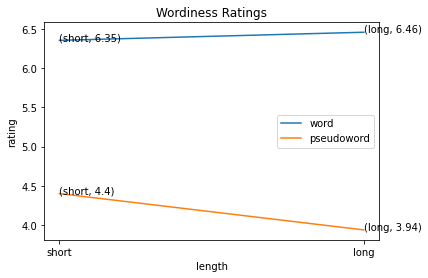

In [47]:
import matplotlib.pyplot as plt

plt.title('Wordiness Ratings')
x = ['short', 'long']
y = [(wordiness_ratings['hfshort']+wordiness_ratings['lfshort'])/2, (wordiness_ratings['hflong']+wordiness_ratings['lflong'])/2]

plt.plot(x, y, label="word")

for i_x, i_y in zip(x, y):
    plt.text(i_x, i_y, '({}, {})'.format(i_x, round(i_y, 2)))

y = [wordiness_ratings['psshort'], wordiness_ratings['pslong']]
plt.plot(x, y, label="pseudoword")

plt.xlabel('length')
plt.ylabel('rating')

for i_x, i_y in zip(x, y):
    plt.text(i_x, i_y, '({}, {})'.format(i_x, round(i_y, 2)))
plt.legend()
plt.show()

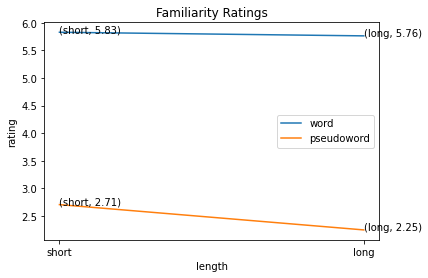

In [48]:
plt.title('Familiarity Ratings')
x = ['short', 'long']
y = [(familiarity_ratings['hfshort']+familiarity_ratings['lfshort'])/2, (familiarity_ratings['hflong']+familiarity_ratings['lflong'])/2]

plt.plot(x, y, label="word")

for i_x, i_y in zip(x, y):
    plt.text(i_x, i_y, '({}, {})'.format(i_x, round(i_y, 2)))

y = [familiarity_ratings['psshort'], familiarity_ratings['pslong']]
plt.plot(x, y, label="pseudoword")

plt.xlabel('length')
plt.ylabel('rating')

for i_x, i_y in zip(x, y):
    plt.text(i_x, i_y, '({}, {})'.format(i_x, round(i_y, 2)))
plt.legend()
plt.show()

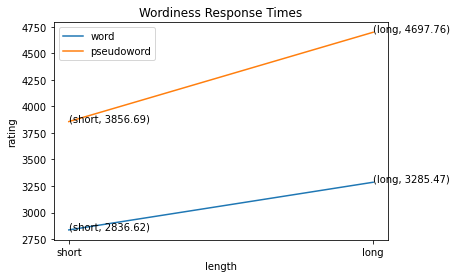

In [49]:
plt.title('Wordiness Response Times')
x = ['short', 'long']
y = [(wordiness_rt['hfshort']+wordiness_rt['lfshort'])/2, (wordiness_rt['hflong']+wordiness_rt['lflong'])/2]

plt.plot(x, y, label="word")

for i_x, i_y in zip(x, y):
    plt.text(i_x, i_y, '({}, {})'.format(i_x, round(i_y, 2)))

y = [wordiness_rt['psshort'], wordiness_rt['pslong']]
plt.plot(x, y, label="pseudoword")

plt.xlabel('length')
plt.ylabel('rating')

for i_x, i_y in zip(x, y):
    plt.text(i_x, i_y, '({}, {})'.format(i_x, round(i_y, 2)))
plt.legend()
plt.show()

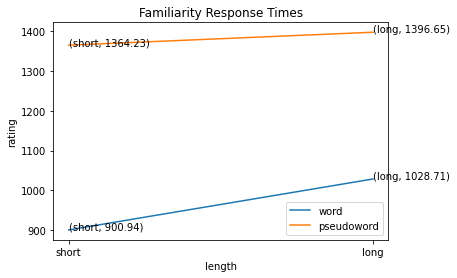

In [50]:
plt.title('Familiarity Response Times')
x = ['short', 'long']
y = [(familiarity_rt['hfshort']+familiarity_rt['lfshort'])/2, (familiarity_rt['hflong']+familiarity_rt['lflong'])/2]

plt.plot(x, y, label="word")

for i_x, i_y in zip(x, y):
    plt.text(i_x, i_y, '({}, {})'.format(i_x, round(i_y, 2)))

y = [familiarity_rt['psshort'], familiarity_rt['pslong']]
plt.plot(x, y, label="pseudoword")

plt.xlabel('length')
plt.ylabel('rating')

for i_x, i_y in zip(x, y):
    plt.text(i_x, i_y, '({}, {})'.format(i_x, round(i_y, 2)))
plt.legend()
plt.show()

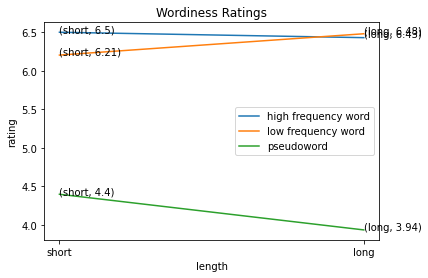

In [51]:


plt.title('Wordiness Ratings')
x = ['short', 'long']
y = [wordiness_ratings['hfshort'], wordiness_ratings['hflong']]

plt.plot(x, y, label="high frequency word")

for i_x, i_y in zip(x, y):
    plt.text(i_x, i_y, '({}, {})'.format(i_x, round(i_y, 2)))

y = [wordiness_ratings['lfshort'], wordiness_ratings['lflong']]
plt.plot(x, y, label="low frequency word")

plt.xlabel('length')
plt.ylabel('rating')

for i_x, i_y in zip(x, y):
    plt.text(i_x, i_y, '({}, {})'.format(i_x, round(i_y, 2)))

y = [wordiness_ratings['psshort'], wordiness_ratings['pslong']]
plt.plot(x, y, label="pseudoword")

plt.xlabel('length')
plt.ylabel('rating')

for i_x, i_y in zip(x, y):
    plt.text(i_x, i_y, '({}, {})'.format(i_x, round(i_y, 2)))
plt.legend()
plt.show()

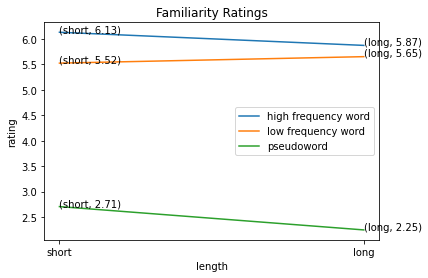

In [52]:

plt.title('Familiarity Ratings')
x = ['short', 'long']
y = [familiarity_ratings['hfshort'], familiarity_ratings['hflong']]

plt.plot(x, y, label="high frequency word")

for i_x, i_y in zip(x, y):
    plt.text(i_x, i_y, '({}, {})'.format(i_x, round(i_y, 2)))

y = [familiarity_ratings['lfshort'], familiarity_ratings['lflong']]
plt.plot(x, y, label="low frequency word")

plt.xlabel('length')
plt.ylabel('rating')

for i_x, i_y in zip(x, y):
    plt.text(i_x, i_y, '({}, {})'.format(i_x, round(i_y, 2)))

y = [familiarity_ratings['psshort'], familiarity_ratings['pslong']]
plt.plot(x, y, label="pseudoword")

plt.xlabel('length')
plt.ylabel('rating')

for i_x, i_y in zip(x, y):
    plt.text(i_x, i_y, '({}, {})'.format(i_x, round(i_y, 2)))
plt.legend()
plt.show()

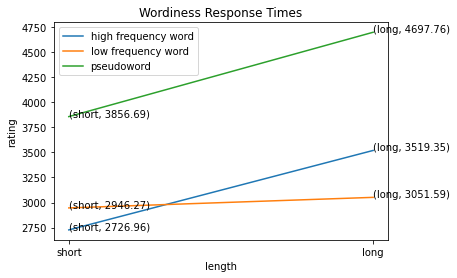

In [53]:
plt.title('Wordiness Response Times')
x = ['short', 'long']
y = [wordiness_rt['hfshort'], wordiness_rt['hflong']]

plt.plot(x, y, label="high frequency word")

for i_x, i_y in zip(x, y):
    plt.text(i_x, i_y, '({}, {})'.format(i_x, round(i_y, 2)))

y = [wordiness_rt['lfshort'], wordiness_rt['lflong']]
plt.plot(x, y, label="low frequency word")

plt.xlabel('length')
plt.ylabel('rating')

for i_x, i_y in zip(x, y):
    plt.text(i_x, i_y, '({}, {})'.format(i_x, round(i_y, 2)))

y = [wordiness_rt['psshort'], wordiness_rt['pslong']]
plt.plot(x, y, label="pseudoword")

plt.xlabel('length')
plt.ylabel('rating')

for i_x, i_y in zip(x, y):
    plt.text(i_x, i_y, '({}, {})'.format(i_x, round(i_y, 2)))
plt.legend()
plt.show()

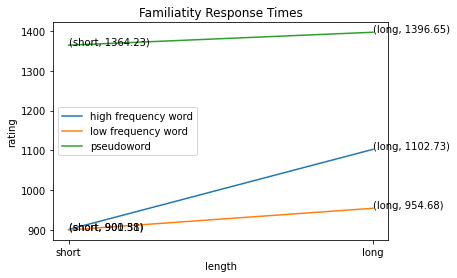

In [54]:
plt.title('Familiatity Response Times')
x = ['short', 'long']
y = [familiarity_rt['hfshort'], familiarity_rt['hflong']]

plt.plot(x, y, label="high frequency word")

for i_x, i_y in zip(x, y):
    plt.text(i_x, i_y, '({}, {})'.format(i_x, round(i_y, 2)))

y = [familiarity_rt['lfshort'], familiarity_rt['lflong']]
plt.plot(x, y, label="low frequency word")

plt.xlabel('length')
plt.ylabel('rating')

for i_x, i_y in zip(x, y):
    plt.text(i_x, i_y, '({}, {})'.format(i_x, round(i_y, 2)))

y = [familiarity_rt['psshort'], familiarity_rt['pslong']]
plt.plot(x, y, label="pseudoword")

plt.xlabel('length')
plt.ylabel('rating')

for i_x, i_y in zip(x, y):
    plt.text(i_x, i_y, '({}, {})'.format(i_x, round(i_y, 2)))
plt.legend()
plt.show()

### Review

In [ ]:
exp_df[exp_df['participant'].isin(reaction_time_outliers)]

,participant,upiyat_wrd_rat,upiyat_wrd_tim,upiyat_fam_rat,upiyat_fam_tim,asnmvanngh_wrd_rat,asnmvanngh_wrd_tim,asnmvanngh_fam_rat,asnmvanngh_fam_tim,jarjnnd_wrd_rat,jarjnnd_wrd_tim,jarjnnd_fam_rat,jarjnnd_fam_tim,khalatvki_wrd_rat,khalatvki_wrd_tim,khalatvki_fam_rat,khalatvki_fam_tim,thera_wrd_rat,thera_wrd_tim,thera_fam_rat,thera_fam_tim,lulphnn_wrd_rat,lulphnn_wrd_tim,lulphnn_fam_rat,lulphnn_fam_tim,barijaz_wrd_rat,barijaz_wrd_tim,barijaz_fam_rat,barijaz_fam_tim,shinnshit_wrd_rat,shinnshit_wrd_tim,shinnshit_fam_rat,shinnshit_fam_tim,dakdoon_wrd_rat,dakdoon_wrd_tim,dakdoon_fam_rat,dakdoon_fam_tim,tyoglnn_wrd_rat,tyoglnn_wrd_tim,tyoglnn_fam_rat,...,bari_wrd_rat,bari_wrd_tim,bari_fam_rat,bari_fam_tim,baston_wrd_rat,baston_wrd_tim,baston_fam_rat,baston_fam_tim,majhin_wrd_rat,majhin_wrd_tim,majhin_fam_rat,majhin_fam_tim,barso_wrd_rat,barso_wrd_tim,barso_fam_rat,barso_fam_tim,vrishti_wrd_rat,vrishti_wrd_tim,vrishti_fam_rat,vrishti_fam_tim,chhutte_wrd_rat,chhutte_wrd_tim,chhutte_fam_rat,chhutte_fam_tim,oophan_wrd_rat,oophan_wrd_tim,oophan_fam_rat,oophan_fam_tim,tahal_wrd_rat,tahal_wrd_tim,tahal_fam_rat,tahal_fam_tim,saph_wrd_rat,saph_wrd_tim,saph_fam_rat,saph_fam_tim,tope_wrd_rat,tope_wrd_tim,tope_fam_rat,tope_fam_tim
1,s.67a27c69-ad1f-4483-9657-fc53e1805d7c.txt,7.0,2862.0,4.0,2087.0,6.327273,4284.218182,4.0,990.0,4.0,6473.0,4.0,3286.0,6.327273,4284.218182,2.0,3041.0,7.000000,7023.000000,4.0,2012.0,6.0,4839.0,4.0,1376.0,3.00000,4655.000000,3.0,1262.0,6.0,3664.0,4.0,2967.0,7.0,4498.0,4.0,1833.0,6.0,3300.0,6.0,...,7.0,2820.0,7.0,1286.0,2.000000,4477.0,2.0,2953.0,7.0,2128.0,4.0,1509.0,7.0,5708.0,6.0,3056.0,7.0,2723.0,6.0,4079.0,7.0,9397.0,7.0,2119.0,6.0,5656.0,6.0,1359.0,7.0,4146.0,7.0,1282.0,7.000000,3810.000000,6.0,1628.0,5.000000,4886.000000,6.0,4617.0
6,s.6a95fe00-3501-4915-a652-2ce6375bc9fd.txt,5.0,5197.0,1.0,592.0,1.000000,5627.000000,1.0,214.0,2.0,3247.0,1.0,385.0,3.000000,6065.000000,1.0,339.0,5.000000,2261.000000,1.0,395.0,5.0,1923.0,1.0,825.0,3.00000,6286.000000,3.0,480.0,3.0,5686.0,1.0,363.0,5.0,3979.0,1.0,459.0,1.0,5448.0,1.0,...,7.0,1005.0,7.0,201.0,7.000000,2520.0,7.0,183.0,5.0,2757.0,1.0,481.0,7.0,638.0,7.0,187.0,7.0,5822.0,5.0,3390.0,7.0,1492.0,7.0,232.0,7.0,1447.0,7.0,168.0,7.0,1056.0,7.0,971.0,7.000000,1268.000000,7.0,70.0,7.000000,2496.000000,7.0,204.0
8,s.7677a9db-0864-474a-a544-6ecbbfddc039.txt,3.0,3462.0,3.0,1479.0,2.000000,5379.000000,1.0,4006.0,5.0,7874.0,2.0,3712.0,3.000000,5730.000000,2.0,1544.0,5.000000,5769.000000,2.0,837.0,3.0,7152.0,2.0,1237.0,2.00000,6600.000000,1.0,1997.0,5.0,8048.0,3.0,1166.0,3.0,8055.0,2.0,2167.0,2.0,6915.0,2.0,...,7.0,2810.0,7.0,388.0,3.000000,5493.0,2.0,2400.0,2.0,5565.0,2.0,1219.0,7.0,3770.0,5.0,1005.0,7.0,3676.0,7.0,387.0,7.0,2528.0,7.0,402.0,2.0,3397.0,2.0,1619.0,7.0,3220.0,7.0,1104.0,6.000000,5300.000000,2.0,1162.0,5.000000,7755.000000,3.0,1568.0
12,s.8326fca6-08e0-46ce-add1-13eba01845dd.txt,4.0,8141.0,2.0,3139.0,3.000000,8513.000000,1.0,1625.0,5.0,7095.0,2.0,7968.0,4.000000,5398.000000,2.0,1891.0,3.000000,6739.000000,6.0,6014.0,4.0,8514.0,2.0,1809.0,6.00000,7881.000000,1.0,6730.0,6.0,6380.0,1.0,2650.0,5.0,6328.0,2.0,2624.0,4.0,5530.0,1.0,...,7.0,1454.0,7.0,926.0,7.000000,4782.0,7.0,305.0,3.0,6026.0,1.0,1622.0,7.0,2051.0,7.0,2072.0,5.0,5079.0,4.0,1951.0,7.0,7865.0,7.0,1059.0,7.0,1753.0,7.0,269.0,7.0,1726.0,7.0,358.0,7.000000,5039.000000,7.0,625.0,7.000000,1618.000000,7.0,274.0
13,s.191b6aa7-7684-4e68-bb97-76ad7444cfd2.txt,7.0,4950.0,7.0,167.0,4.000000,4247.000000,4.0,55.0,5.0,1834.0,4.0,238.0,4.000000,4184.000000,2.0,502.0,4.000000,3725.000000,2.0,585.0,5.0,3182.0,2.0,833.0,5.00000,3196.000000,3.0,509.0,5.0,2415.0,3.0,919.0,7.0,3036.0,7.0,845.0,5.0,4051.0,3.0,...,7.0,1350.0,7.0,162.0,7.000000,2359.0,7.0,128.0,4.0,5300.0,4.0,216.0,7.0,1705.0,7.0,170.0,7.0,2347.0,7.0,109.0,7.0,2537.0,7.0,46.0,2.0,5393.0,1.0,1687.0,7.0,3256.0,7.0,111.0,7.000000,1070.000000,7.0,435.0,7.000000,3094.000000,7.0,239.0
15,s.47471c9d-16cd-4f53-808f-8950ca8bb33f.txt,7.0,1545.0,7.0,309.0,2.000000,3497.00000

In [ ]:
exp_df[exp_df['participant'].isin([x[0] for x in accuracy_outliers])]

,participant,upiyat_wrd_rat,upiyat_wrd_tim,upiyat_fam_rat,upiyat_fam_tim,asnmvanngh_wrd_rat,asnmvanngh_wrd_tim,asnmvanngh_fam_rat,asnmvanngh_fam_tim,jarjnnd_wrd_rat,jarjnnd_wrd_tim,jarjnnd_fam_rat,jarjnnd_fam_tim,khalatvki_wrd_rat,khalatvki_wrd_tim,khalatvki_fam_rat,khalatvki_fam_tim,thera_wrd_rat,thera_wrd_tim,thera_fam_rat,thera_fam_tim,lulphnn_wrd_rat,lulphnn_wrd_tim,lulphnn_fam_rat,lulphnn_fam_tim,barijaz_wrd_rat,barijaz_wrd_tim,barijaz_fam_rat,barijaz_fam_tim,shinnshit_wrd_rat,shinnshit_wrd_tim,shinnshit_fam_rat,shinnshit_fam_tim,dakdoon_wrd_rat,dakdoon_wrd_tim,dakdoon_fam_rat,dakdoon_fam_tim,tyoglnn_wrd_rat,tyoglnn_wrd_tim,tyoglnn_fam_rat,...,bari_wrd_rat,bari_wrd_tim,bari_fam_rat,bari_fam_tim,baston_wrd_rat,baston_wrd_tim,baston_fam_rat,baston_fam_tim,majhin_wrd_rat,majhin_wrd_tim,majhin_fam_rat,majhin_fam_tim,barso_wrd_rat,barso_wrd_tim,barso_fam_rat,barso_fam_tim,vrishti_wrd_rat,vrishti_wrd_tim,vrishti_fam_rat,vrishti_fam_tim,chhutte_wrd_rat,chhutte_wrd_tim,chhutte_fam_rat,chhutte_fam_tim,oophan_wrd_rat,oophan_wrd_tim,oophan_fam_rat,oophan_fam_tim,tahal_wrd_rat,tahal_wrd_tim,tahal_fam_rat,tahal_fam_tim,saph_wrd_rat,saph_wrd_tim,saph_fam_rat,saph_fam_tim,tope_wrd_rat,tope_wrd_tim,tope_fam_rat,tope_fam_tim
5,s.ed01661c-3e6e-45b8-9f79-66a324f8bd85.txt,2.0,2050.0,2.0,152.0,2.000000,4603.000000,2.0,332.0,2.0,1715.0,2.0,272.0,2.000000,7072.0,2.0,879.0,1.0,3773.0,1.0,225.0,3.0,4032.0,2.0,1291.0,1.0,1403.0,1.0,228.0,2.0,2620.0,2.0,902.0,2.0,4869.0,2.0,442.0,3.0,5505.0,3.0,...,7.0,3506.0,7.0,1775.0,5.000000,3384.0,4.0,828.0,1.0,3055.0,1.0,352.0,7.0,2170.0,6.0,1177.0,3.0,2811.0,3.0,1081.0,7.0,3865.0,5.0,1785.0,7.0,5212.0,1.0,1351.0,7.0,1937.0,7.0,283.0,7.000000,1303.000000,7.0,230.0,1.000000,5061.000000,1.000000,465.000000
8,s.7677a9db-0864-474a-a544-6ecbbfddc039.txt,3.0,3462.0,3.0,1479.0,2.000000,5379.000000,1.0,4006.0,5.0,7874.0,2.0,3712.0,3.000000,5730.0,2.0,1544.0,5.0,5769.0,2.0,837.0,3.0,7152.0,2.0,1237.0,2.0,6600.0,1.0,1997.0,5.0,8048.0,3.0,1166.0,3.0,8055.0,2.0,2167.0,2.0,6915.0,2.0,...,7.0,2810.0,7.0,388.0,3.000000,5493.0,2.0,2400.0,2.0,5565.0,2.0,1219.0,7.0,3770.0,5.0,1005.0,7.0,3676.0,7.0,387.0,7.0,2528.0,7.0,402.0,2.0,3397.0,2.0,1619.0,7.0,3220.0,7.0,1104.0,6.000000,5300.000000,2.0,1162.0,5.000000,7755.000000,3.000000,1568.000000
10,s.b10f533a-fcaf-4a43-99ce-6e1be51bbf39.txt,5.0,4436.0,3.0,1074.0,3.000000,8610.000000,1.0,531.0,4.0,7393.0,3.0,1077.0,1.000000,5136.0,1.0,461.0,5.0,2897.0,2.0,2563.0,2.0,4451.0,1.0,1104.0,2.0,5650.0,2.0,705.0,1.0,6272.0,2.0,812.0,5.0,4680.0,3.0,1091.0,1.0,5159.0,1.0,...,6.0,4965.0,7.0,307.0,6.000000,4558.0,4.0,244.0,1.0,4986.0,1.0,843.0,6.0,2490.0,3.0,541.0,6.0,3826.0,5.0,260.0,7.0,3408.0,7.0,690.0,3.0,4074.0,2.0,1291.0,7.0,5164.0,7.0,620.0,7.000000,5546.000000,7.0,170.0,6.000000,2955.000000,5.000000,893.000000
11,s.99d9dbc6-1c5a-40a8-96b2-37eefd92cacb.txt,5.0,2621.0,2.0,1631.0,5.271186,3944.932203,3.0,1165.0,3.0,5504.0,1.0,1910.0,3.000000,4988.0,1.0,1543.0,5.0,4121.0,3.0,1033.0,2.0,4386.0,1.0,767.0,2.0,3337.0,2.0,858.0,4.0,6916.0,1.0,2080.0,5.0,3827.0,2.0,1850.0,2.0,5084.0,2.0,...,7.0,2851.0,7.0,1011.0,7.000000,2050.0,7.0,366.0,5.0,3610.0,1.0,3442.0,7.0,1819.0,7.0,1333.0,6.0,4778.0,3.0,2339.0,7.0,2883.0,7.0,654.0,5.0,3305.0,2.0,2061.0,7.0,2437.0,7.0,1389.0,7.000000,1803.000000,7.0,1000.0,7.000000,2697.000000,7.000000,2159.000000
14,s.4a4121a7-394c-486f-935c-7b024ae2b63d.txt,3.0,4921.0,2.0,755.0,3.000000,4316.000000,2.0,763.0,3.0,4970.0,2.0,1408.0,3.000000,4348.0,2.0,1079.0,3.0,2188.0,2.0,1664.0,2.0,3353.0,1.0,1894.0,4.0,4866.0,2.0,580.0,4.0,4016.0,3.0,465.0,3.0,2995.0,2.0,770.0,2.0,4228.0,2.0,...,7.0,1462.0,7.0,247.0,5.000000,5234.0,3.0,971.0,5.0,4683.0,2.0,778.0,7.0,2573.0,6.0,636.0,6.0,3208.0,3.0,611.0,5.0,5155.0,3.0,716.0,7.0,2893.0,6.0,439.0,7.0,3388.0,6.0,1675.0,7.000000,1398.000000,7.0,262.0,5.000000,2527.000000,3.000000,1299.000000
17,s.57206276-2b6c-478b-86b3-e1ac5903a14a.txt,1.0,9048.0,1.0,1023.0,4.000000,6166.000000,1.0,1164.0,4.0,4070.0,1.0,1438.0,4.000000,4863.0,1.0,1218.0,4.

# Merge

In [ ]:
merged_df = pd.merge(pd.merge(sur_df,tim_df,on='participant'),exp_df,on='participant')

In [ ]:
!pip install pandas-profiling

In [ ]:
merged_df

,participant,Email:1,age:1,Vis:1,VisFix:1,Status:1,Hindi:1,Hindi:2,Hindi:3,Hindi:4,English:1,English:2,English:3,English:4,lchoice:1,lchoice:2,lchoice:3,lchoice:4,lchoice:5,lchoice:6,lchoice:7,lchoice:8,lchoice:9,lchoice:10,lchoice:11,lchoice:12,pseudex:1,Thank:1,TIME_start_x,TIME_end_x,TIME_total_x,Section_Details,Email,age,Vis,VisFix,Status,Hindi,English,lchoice,...,bari_wrd_rat,bari_wrd_tim,bari_fam_rat,bari_fam_tim,baston_wrd_rat,baston_wrd_tim,baston_fam_rat,baston_fam_tim,majhin_wrd_rat,majhin_wrd_tim,majhin_fam_rat,majhin_fam_tim,barso_wrd_rat,barso_wrd_tim,barso_fam_rat,barso_fam_tim,vrishti_wrd_rat,vrishti_wrd_tim,vrishti_fam_rat,vrishti_fam_tim,chhutte_wrd_rat,chhutte_wrd_tim,chhutte_fam_rat,chhutte_fam_tim,oophan_wrd_rat,oophan_wrd_tim,oophan_fam_rat,oophan_fam_tim,tahal_wrd_rat,tahal_wrd_tim,tahal_fam_rat,tahal_fam_tim,saph_wrd_rat,saph_wrd_tim,saph_fam_rat,saph_fam_tim,tope_wrd_rat,tope_wrd_tim,tope_fam_rat,tope_fam_tim
0,s.2e95df5d-5932-4808-bc57-072590642426.txt,shlokpandey123@gmail.com,20,2,NaN,1,5,5,5,5,3,3,4,4,2,2,1,1,2,2,3,2,3,3,1,1,pseudovalidation_exp.2021-11-30-0833.data.2e95...,Experiment was done very well. GG,2021-11-30-08-26,2021-11-30-08-34,8,3685,19937,10881,12261,NaN,4988,23184,16907,59528,...,7,1213,7,417,2,3931,1,1005,5,2104,1,3615,7,2104,7,460,7,1441,7,470,7,548,7,441,7,1049,7,417,7,1457,7,461,7,1814,7,778,3,1973,2,1143
1,s.67a27c69-ad1f-4483-9657-fc53e1805d7c.txt,vsg051007@gmail.com,42,1,2.0,1,3,2,2,1,3,4,4,4,2,2,2,1,2,2,1,2,3,3,1,3,pseudovalidation_exp.2021-12-03-1438.data.67a2...,many of the spellings were in different form o...,2021-12-03-14-26,2021-12-03-14-40,14,3139,23323,5691,51638,12339.0,13449,33453,34123,83213,...,7,2820,7,1286,2,4477,2,2953,7,2128,4,1509,7,5708,6,3056,7,2723,6,4079,7,9397,7,2119,6,5656,6,1359,7,4146,7,1282,7,3810,6,1628,5,4886,6,4617
2,s.60385e94-29fc-4ffb-878f-867665113c18.txt,mihir.bani@research.iiit.ac.in,21,2,NaN,1,4,4,3,2,3,3,4,2,2,2,3,1,2,2,1,2,2,2,1,1,pseudovalidation_exp.2021-11-28-0806.data.6038...,NaN,2021-11-28-07-56,2021-11-28-08-06,10,3357,14769,3916,28617,NaN,9136,64424,21670,44789,...,7,1357,7,364,7,2437,7,309,6,3994,6,581,7,4019,7,337,6,3554,6,297,7,1771,7,331,6,2697,5,3022,7,1451,7,385,7,1083,7,374,7,4704,7,623
3,s.c40f67fa-a84a-48b5-938a-df2b67b01ea2.txt,yashbhansali0906@gmail.com,21,4,NaN,1,5,5,4,3,4,4,4,5,2,2,3,3,3,2,3,2,1,3,1,3,pseudovalidation_exp.2021-11-26-1740.data.c40f...,NaN,2021-11-26-17-30,2021-11-26-17-40,10,5405,9436,5334,40262,NaN,7361,38027,17053,61152,...,7,2648,7,2169,1,4666,1,398,4,8047,1,5018,7,1856,7,399,6,5088,1,1128,7,4887,7,351,7,1059,7,701,7,2993,7,233,7,1527,7,134,7,3407,7,232
4,s.92ad5af8-a1a6-4e2f-bb7c-12547e641bea.txt,praneetside@gmail.com,21,1,1.0,1,4,4,5,4,3,4,5,3,2,2,2,1,1,2,1,2,2,2,1,1,pseudovalidation_exp.2021-11-26-1719.data.92ad...,NaN,2021-11-26-17-12,2021-11-26-17-19,7,2427,9336,3263,8268,14573.0,3415,25922,33967,26576,...,7,1438,7,287,4,3117,3,1459,5,2838,3,598,7,1847,7,339,7,998,7,375,7,1441,7,121,7,1620,7,270,7,1156,7,362,7,1010,7,269,7,2262,7,245
5,s.ed01661c-3e6e-45b8-9f79-66a324f8bd85.txt,gokul.vamsi@research.iiit.ac.in,19,1,1.0,1,3,4,4,2,5,5,5,5,2,2,2,2,2,2,2,2,2,2,2,2,pseudovalidation_exp.2021-11-29-1418.data.ed01...,NaN,2021-11-29-14-09,2021-11-29-14-19,10,3137,15471,5145,17195,13809.0,5332,29994,30073,41495,...,7,3506,7,1775,5,3384,4,828,1,3055,1,352,7,2170,6,1177,3,2811,3,1081,7,3865,5,1785,7,5212,1,1351,7,1937,7,283,7,1303,7,230,1,5061,1,465
6,s.6a95fe00-3501-4915-a652-2ce6375bc9fd.txt,rajputsaransh007@gmail.com,21,2,NaN,1,4,5,4,4,4,5,5,4,2,2,2,2,2,2,3,2,2,3,1,3,pseudovalidation_exp.2021-11-29-0910.data.6a95...,NaN,2021-11-29-09-03,2021-11-29-09-10,7,2788,11886,2227,10338,NaN,4195,25961,19169,39167,...,7,1005,7,201,7,2520,7,183,5,2757,1,481,7,638,7,187,7,5822,5,3390,7,1492,7,232,7,1447,7,168,7,1056,7,971,7,1268,7,70,7,2496,7,204
7,s.7e5bd8da-7e75-4c49-bbd0-4d71dffa5dc2.txt,rotkarvasu@gmail.com,20,1,1.0,1,5,5,5,5,5,5,5,5,3,3,1,1,1,2,1,2,1,3,1,1,pseudovalidation_exp.2021-11-26-1720.data.7e5b...,NaN,2021

In [ ]:
%%capture
!pip install pandas-profiling==2.7.1

## Report

In [ ]:
plist

['s.57206276-2b6c-478b-86b3-e1ac5903a14a.txt',
 's.dace70c2-4cf5-4370-be7a-59c0ab049d19.txt',
 's.b10f533a-fcaf-4a43-99ce-6e1be51bbf39.txt',
 's.ed01661c-3e6e-45b8-9f79-66a324f8bd85.txt',
 's.ac411e78-5e9b-4f9e-a0d7-584651264878.txt',
 's.7677a9db-0864-474a-a544-6ecbbfddc039.txt']

In [ ]:
sur_df[sur_df.participant.isin(plist)]

,participant,Email:1,age:1,Vis:1,VisFix:1,Status:1,Hindi:1,Hindi:2,Hindi:3,Hindi:4,English:1,English:2,English:3,English:4,lchoice:1,lchoice:2,lchoice:3,lchoice:4,lchoice:5,lchoice:6,lchoice:7,lchoice:8,lchoice:9,lchoice:10,lchoice:11,lchoice:12,pseudex:1,Thank:1,TIME_start,TIME_end,TIME_total
5,s.ed01661c-3e6e-45b8-9f79-66a324f8bd85.txt,gokul.vamsi@research.iiit.ac.in,19,1,1.0,1,3,4,4,2,5,5,5,5,2,2,2,2,2,2,2,2,2,2,2,2,pseudovalidation_exp.2021-11-29-1418.data.ed01...,NaN,2021-11-29-14-09,2021-11-29-14-19,10
8,s.7677a9db-0864-474a-a544-6ecbbfddc039.txt,srijan.chakraborty@research.iiit.ac.in,20,2,NaN,1,4,4,4,3,5,4,5,5,2,2,2,2,3,2,2,2,2,3,2,3,pseudovalidation_exp.2021-12-03-1143.data.7677...,thanks!,2021-12-03-11-34,2021-12-03-11-44,10
10,s.b10f533a-fcaf-4a43-99ce-6e1be51bbf39.txt,snehal.kumar@students.iiit.ac.in,20,1,2.0,1,5,5,5,5,5,5,5,5,2,2,2,2,2,2,2,2,2,2,1,1,pseudovalidation_exp.2021-11-29-1855.data.b10f...,NaN,2021-11-29-18-47,2021-11-29-18-55,8
17,s.57206276-2b6c-478b-86b3-e1ac5903a14a.txt,svenkatesh131@gmail.com,42,1,1.0,1,4,4,4,2,4,4,5,3,2,2,3,3,3,2,3,3,1,1,1,3,pseudovalidation_exp.2021-12-01-1317.data.5720...,interesting survey,2021-12-01-13-04,2021-12-01-13-17,13
21,s.ac411e78-5e9b-4f9e-a0d7-584651264878.txt,amul.agrawal@students.iiit.ac.in,20,1,1.0,1,4,4,3,3,3,4,4,4,2,2,1,2,2,2,1,2,1,2,1,1,pseudovalidation_exp.2021-11-29-0915.data.ac41...,you should give both questions for a word toge...,2021-11-29-09-03,2021-11-29-09-16,13
34,s.dace70c2-4cf5-4370-be7a-59c0ab049d19.txt,harshit.g@research.iiit.ac.in,21,1,2.0,1,5,5,4,4,5,5,5,5,2,2,2,3,3,3,3,2,3,3,3,3,pseudovalidation_exp.2021-12-01-1451.data.dace...,All The Best!,2021-12-01-14-44,2021-12-01-14-51,7


In [ ]:
len(clean_sur_df)

36

In [ ]:
report_df = clean_sur_df.loc[:,['age:1',
 'Hindi:1',
 'Hindi:2',
 'Hindi:3',
 'Hindi:4',
 'English:1',
 'English:2',
 'English:3',
 'English:4',
 'lchoice:1',
 'lchoice:2',
 'lchoice:3',
 'lchoice:4',
 'lchoice:5',
 'lchoice:6',
 'lchoice:7',
 'lchoice:8',
 'lchoice:9',
 'lchoice:10',
 'lchoice:11',
 'lchoice:12']]

In [ ]:
report_df['Hindi:avg'] =  report_df[[f'Hindi:{i+1}' for i in range(4)]].mean(axis=1)
report_df['English:avg'] =  report_df[[f'English:{i+1}' for i in range(4)]].mean(axis=1)
for i in range(12):
  report_df[f'lchoice:{i+1}'] = report_df[f'lchoice:{i+1}'].apply(lambda x: {1:2, 2:1, 3:1.5}[x])

In [ ]:
report_df

,age:1,Hindi:1,Hindi:2,Hindi:3,Hindi:4,English:1,English:2,English:3,English:4,lchoice:1,lchoice:2,lchoice:3,lchoice:4,lchoice:5,lchoice:6,lchoice:7,lchoice:8,lchoice:9,lchoice:10,lchoice:11,lchoice:12,Hindi:avg,English:avg
0,20,5,5,5,5,3,3,4,4,1.0,1.0,2.0,2.0,1.0,1.0,1.5,1.0,1.5,1.5,2.0,2.0,5.00,3.50
1,42,3,2,2,1,3,4,4,4,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.5,1.5,2.0,1.5,2.00,3.75
2,21,4,4,3,2,3,3,4,2,1.0,1.0,1.5,2.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,3.25,3.00
3,21,5,5,4,3,4,4,4,5,1.0,1.0,1.5,1.5,1.5,1.0,1.5,1.0,2.0,1.5,2.0,1.5,4.25,4.25
4,21,4,4,5,4,3,4,5,3,1.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,4.25,3.75
6,21,4,5,4,4,4,5,5,4,1.0,1.0,1.0,1.0,1.0,1.0,1.5,1.0,1.0,1.5,2.0,1.5,4.25,4.50
7,20,5,5,5,5,5,5,5,5,1.5,1.5,2.0,2.0,2.0,1.0,2.0,1.0,2.0,1.5,2.0,2.0,5.00,5.00
9,46,5,5,5,5,3,3,4,4,1.0,1.0,1.5,2.0,1.5,1.0,1.5,1.0,1.5,2.0,2.0,2.0,5.00,3.50
11,20,4,5,4,3,5,5,5,5,1.0,1.0,1.0,1.5,1.5,1.0,1.5,1.0,1.5,1.0,1.5,1.5,4.00,5.00
12,21,4,5,3,3,4,4,4,4,1.0,1.0,1.5,1.5,1.0,1.0,1.5,1.0,1.5,1.0,2.0,2.0,3.75,4.00


In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
report = report_df.profile_report(
    vars={
        "num": {"low_categorical_threshold": 0},
    },
    missing_diagrams={
        "heatmap": False,
        "dendrogram": False,
    },
    correlations={
        "pearson": {"calculate": False},
        "spearman": {"calculate": False},
        "kendall": {"calculate": False},
        "phi_k": {"calculate": False},
        "cramers": {"calculate": False},
    },
)

In [ ]:
report.to_file(output_file="output.html")

Summarize dataset:   0%|          | 0/31 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]